<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

###  Feature Engineering, Regression, and Regularization

---

The application of machine learning to home pricing is a burgeoning field. Companies like OpenDoor are taking on the historically insular and unscientific real estate sales market by applying data science to better predict trends, detect patterns, and ultimately undercut the competition. 

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The housing data available in this project has around 80 different variables cataloguing a wide variety of attributes for real estate properties. The target variable of interest is the sales price.

What has the most impact on the sales price of a house? Is just using square footage and building age sufficient, or are there other less obvious factors at play? You'll get to investigate what's important using EDA and regularized regression models, and practice model evaluation and cross-validation.

---

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `housing.csv` dataset

---

The csv is located in the `DSI-SF-4/datasets/housing_regression` folder in your repo. 

**There is a file describing the columns in the dataset in the `data_description.txt` file in the same folder that contains the information on what the variables represent.**


In [420]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math as m
import statsmodels.api as sm
import matplotlib.pyplot as pl
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [421]:
house = pd.read_csv('/Users/roshkhadka/Desktop/DSI-SF-4/datasets/housing_regression/housing.csv')

fil = open('/Users/roshkhadka/Desktop/DSI-SF-4/datasets/housing_regression/data_description.txt', "r")


In [422]:
separating_numbers_objects = house.columns.to_series().groupby(house.dtypes).groups
separating_numbers_objects

{dtype('int64'): ['Id',
  'MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 dtype('float64'): ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 dtype('O'): ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Examine the `SalePrice` variable

---

### 2.1 Plot the distribution of the `SalesPrice` variable and describe it with pandas

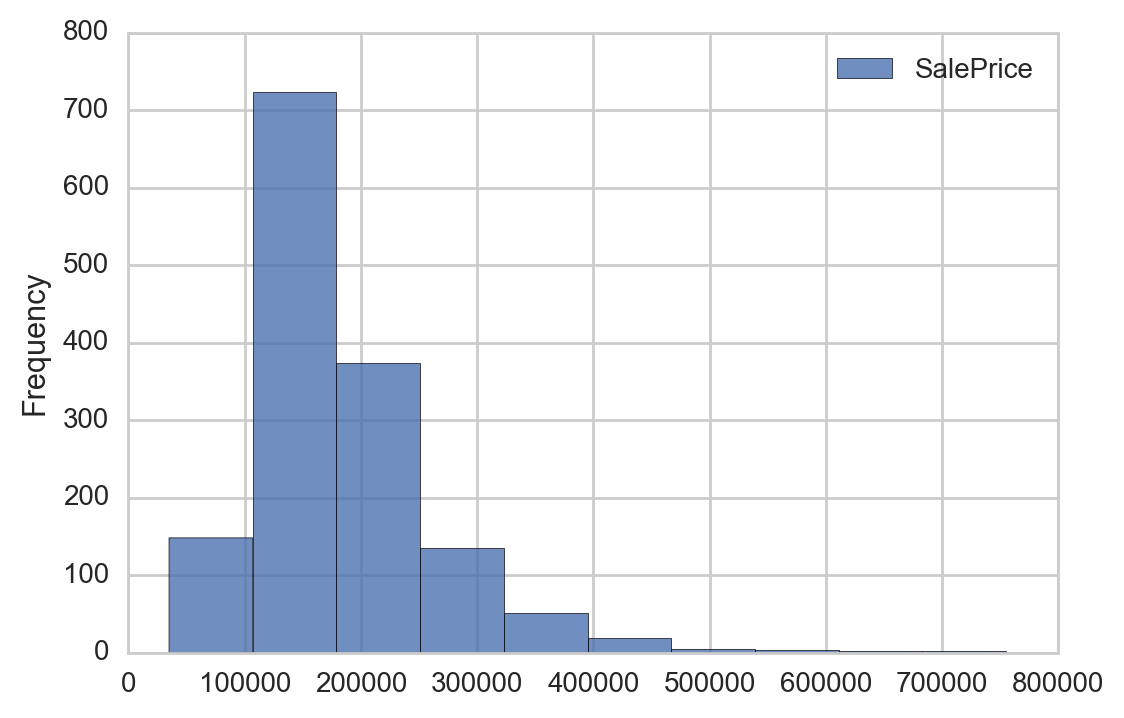

In [423]:
target.plot.hist(alpha=.8, bins=10)
plt.show()

In [424]:
pd.DataFrame(house.SalePrice.describe())

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### 2.2 Create a transformed version of the `SalesPrice` variable that makes it more normally distributed

Two common transformations to deal with long tails are taking the square root and taking the log of a variable. 

Plot the transformed variable.

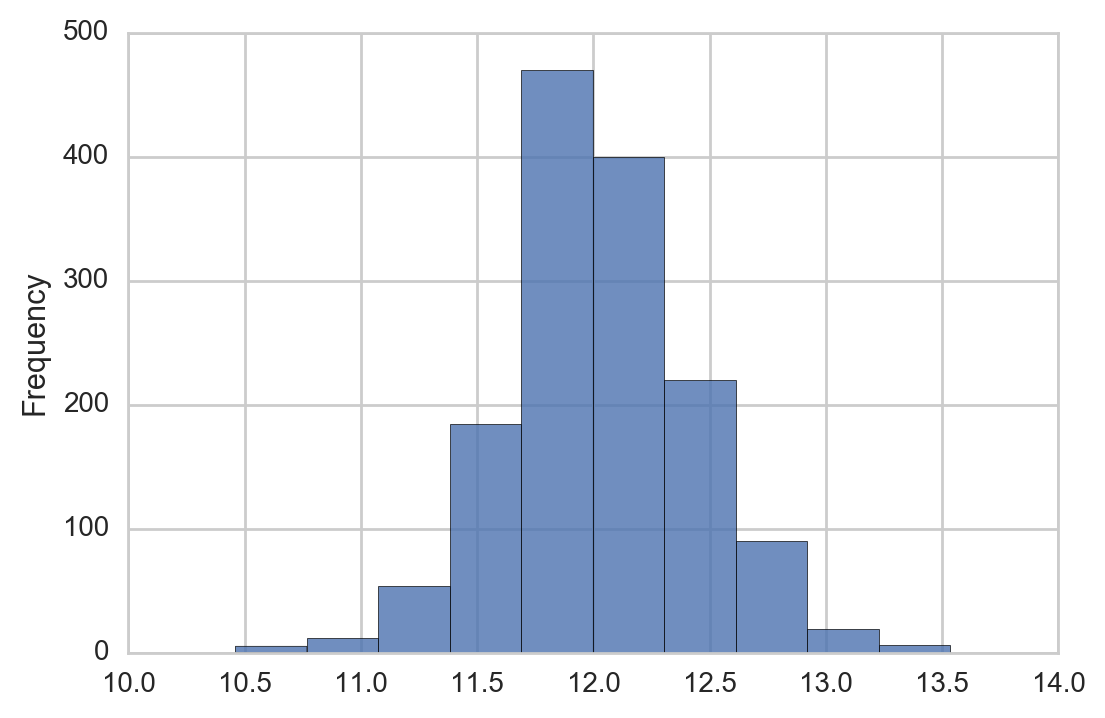

In [425]:
house['sales_trans_sqrt'] = target**0.5
house['sales_trans_log'] = np.log(target)

house.sales_trans_log.plot.hist(alpha=.8, bins=10)
plt.show()



## 3. Correlations with sale price

---

### 3.1 Correlate the age of a house when sold with the sale price

How is the correlation different when using the original and transformed sale price?


--> The age of the house has a negative correlation with the sale price. As the age of the house increases the value of the houses decreases. The correlation is at -0.523 before transforming our target variable. Once transformed, the correlation increased by a minute amount at -0.564(sqrt) and -0.587(log). 

In [430]:
house['age'] = house['YrSold'] - house['YearBuilt']

In [431]:
print'Correlation between age and sale price without Transforming:','\n',(house[['age','SalePrice']].corr())
print'\n'
print'Correlation between age and sale price transformed using sqrt:','\n',(house[['age','sales_trans_sqrt']].corr())
print'\n'
print'Correlation between age and sale price transformed using log:','\n',(house[['sales_trans_log','age']].corr())

Correlation between age and sale price without Transforming: 
               age  SalePrice
age        1.00000   -0.52335
SalePrice -0.52335    1.00000


Correlation between age and sale price transformed using sqrt: 
                       age  sales_trans_sqrt
age               1.000000         -0.564853
sales_trans_sqrt -0.564853          1.000000


Correlation between age and sale price transformed using log: 
                 sales_trans_log      age
sales_trans_log          1.00000 -0.58729
age                     -0.58729  1.00000


### 3.2 Plot the age of the house at sale against the sale price variables

How does it differ between the original and transformed variables? What do the charts indicate about the relationship between the variables?

--> The actual and the transformed variables look very similar, however, the transformed variable seems to have a greater variance. The greater variance is to be expected since sq rooting our target linerises the relation between the target and r^2. The increase in variance leads to a stronger correlation. 

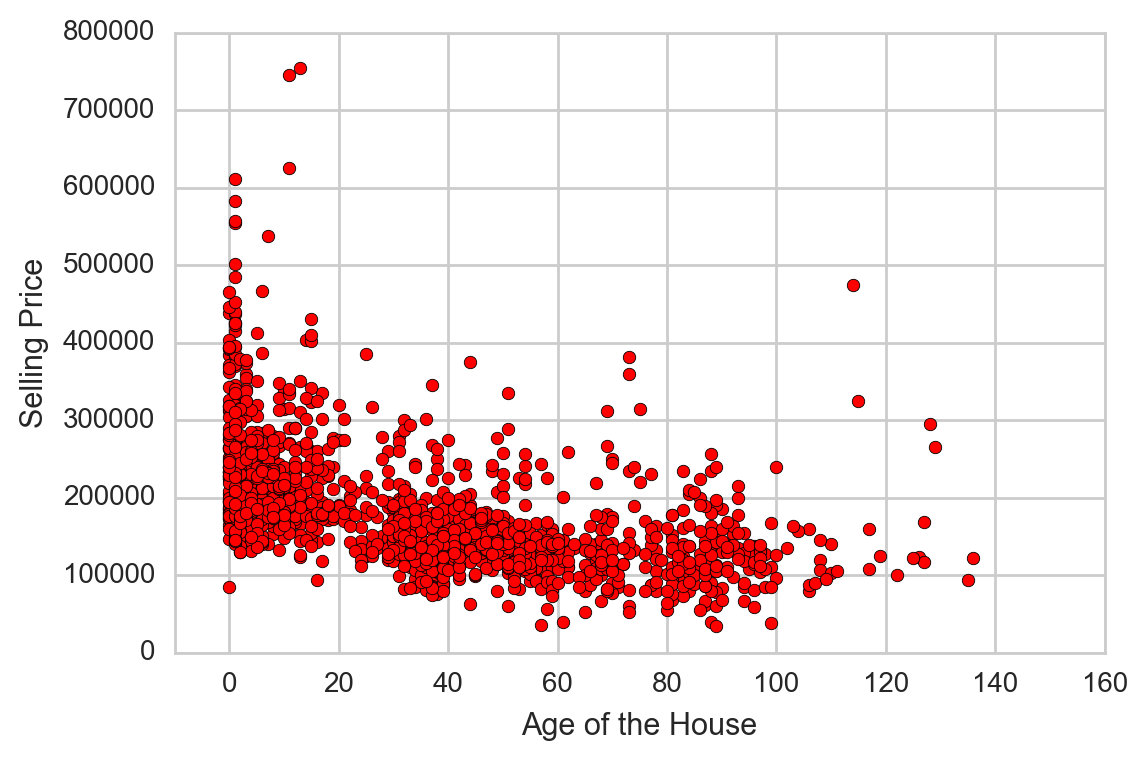

In [455]:
ax = plt.scatter(house.age, house.SalePrice, c='r',)
plt.xlabel("Age of the House")
plt.ylabel("Selling Price")
plt.ylim(0,800000)
plt.xlim(-10,160)
plt.show()


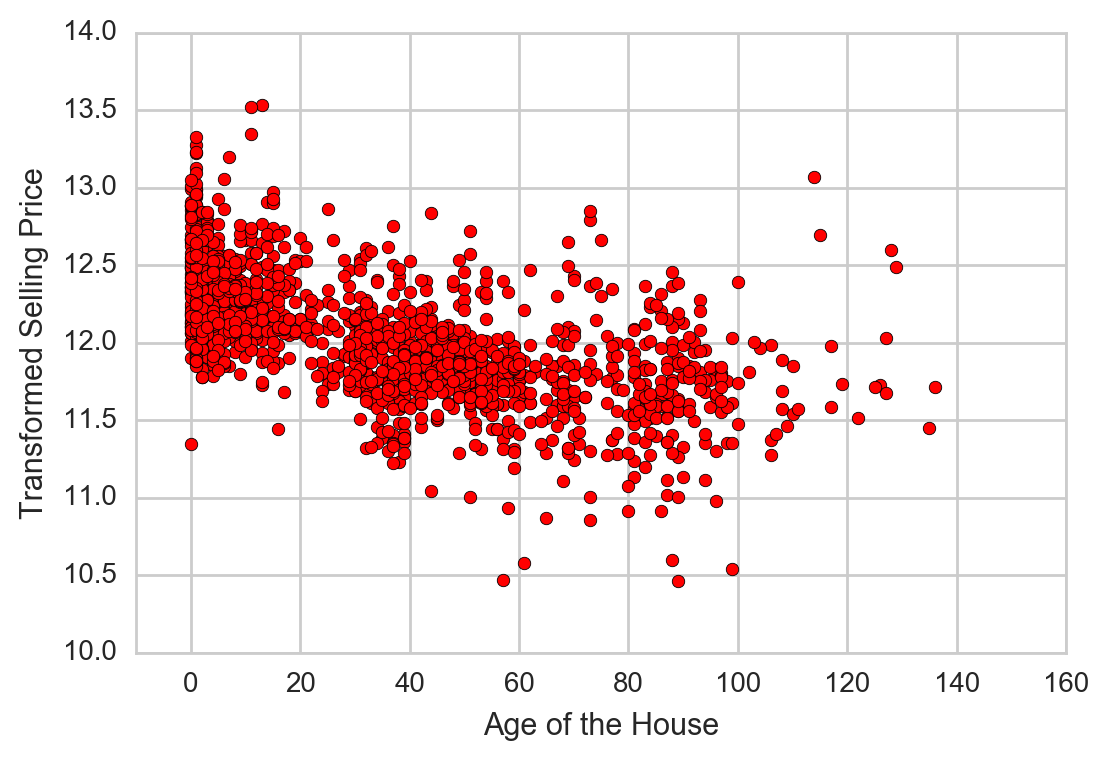

In [456]:
ax = plt.scatter(house.age, house['sales_trans_log'], c='r')
plt.xlabel("Age of the House")
plt.ylabel("Transformed Selling Price")
plt.ylim(10,14.0)
plt.xlim(-10,160)
plt.show()


### 3.3 Visually compare price to total livable square feet, `GrLivArea`

What is the relationship, if any?

--> According to the graph liviable sq feet has a direct positive correlation with selling price. Greater the livable sq feet of the house, higher its selling price. 

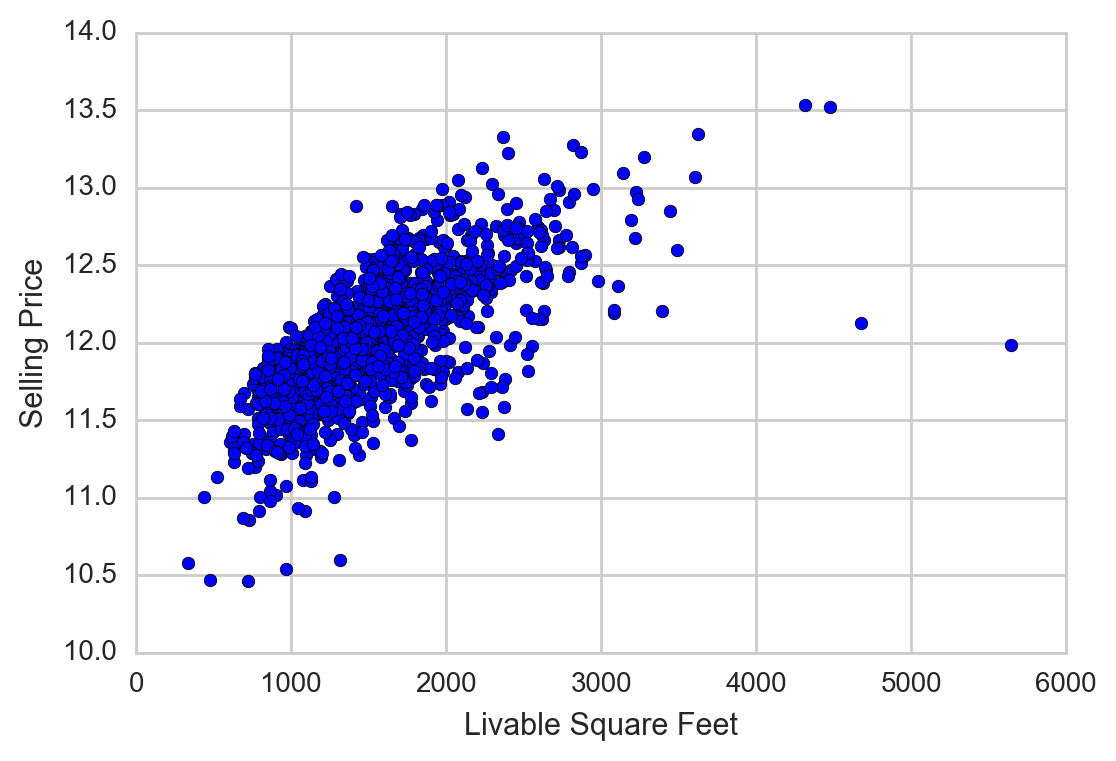

In [468]:
plt.scatter(house['GrLivArea'], house.sales_trans_log)
plt.xlabel("Livable Square Feet")
plt.ylabel("Selling Price")
plt.show()

### 3.4 Plot and describe the relationship between two continuous variables of your choice in the data

Why did you choose those variables? What is the relationship that the chart sbows, if any?

I was solely thinking about san francisco when I picked this variable. Parking space is definitely something that affects the house or rent price in san francisco. Comparing garage space with selling price shows a decent positive correlation. 

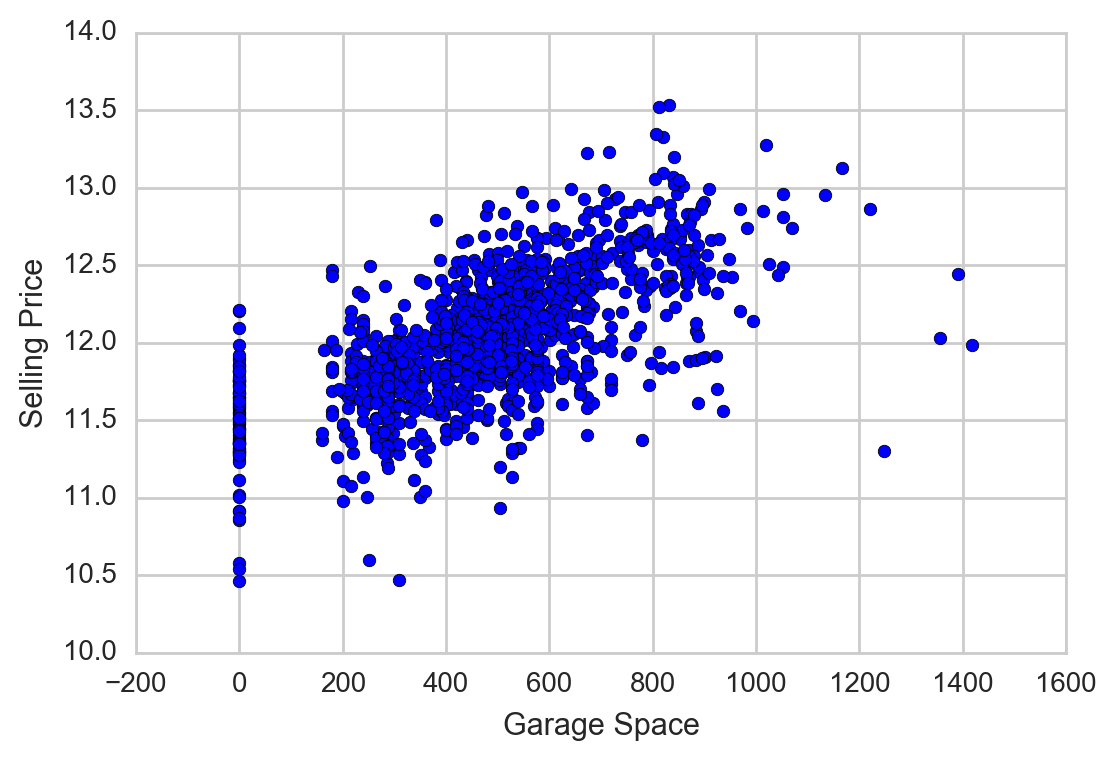

In [469]:
plt.scatter(house['GarageArea'], house.sales_trans_log)
plt.xlabel("Garage Space")
plt.ylabel("Selling Price")
plt.show()

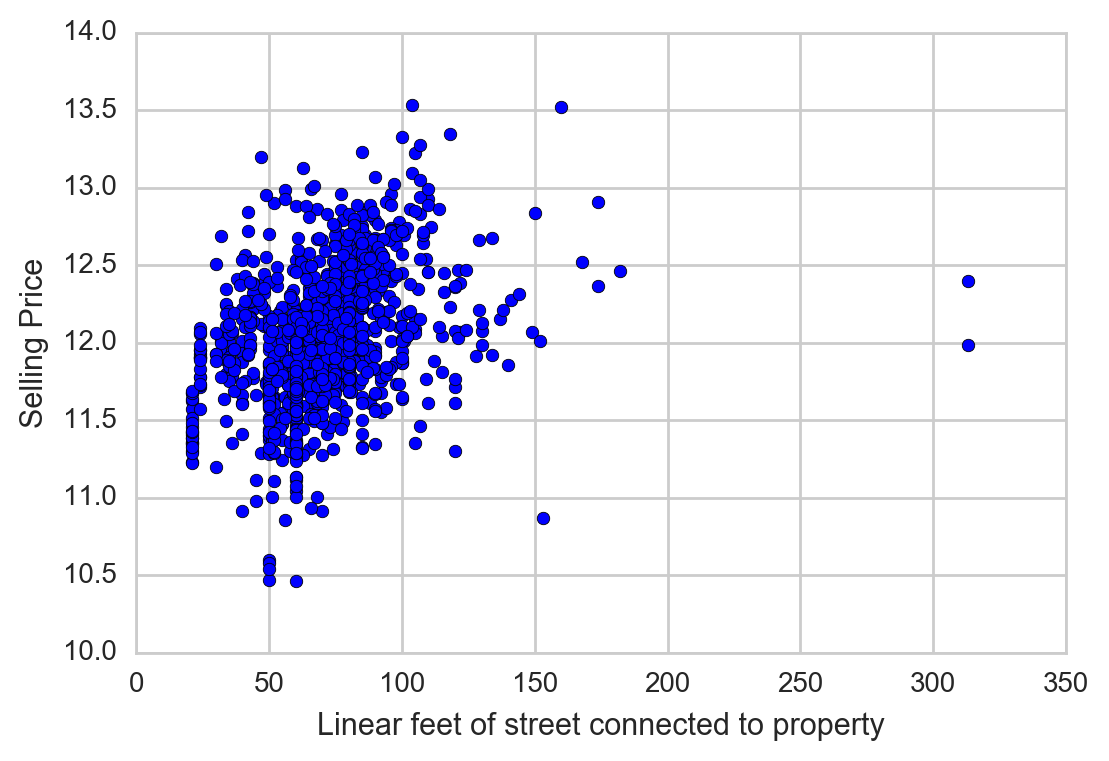

In [471]:
plt.scatter(house['LotFrontage'], house.sales_trans_log)
plt.xlabel("Linear feet of street connected to property")
plt.ylabel("Selling Price")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Data transformation and quality assessment

---

**Note: from this point onward, you can use your transformed price variable or the original price variable. Up to you. It will change the interpretation of the coefficients in your model.**

### 4.1 Restrict the data 

Only keep houses that are residential (remove the commercial code buildings).

### Identifies the general zoning classification of the sale.',
 '       A\tAgriculture',
 '       C\tCommercial',
 '       FV\tFloating Village Residential',
 '       I\tIndustrial',
 '       RH\tResidential High Density',
 '       RL\tResidential Low Density',
 '       RP\tResidential Low Density Park ',
 '       RM\tResidential Medium Density',


In [473]:
house = house.loc[house['MSZoning'].isin(['FV','RH','RL','RP','RM'])]

### 4.2 Handle null values in the dataset

Many of the variables contain null values. In many of these cases the null value is actually representative of a category that is a level of a categorical variable.

Eliminate the null values from your dataset, explaining your rationale for each variable. You have options for null values:

- Replace the null values (impute).
- Drop the observation.
- Drop the variable. 

In [474]:
house.isnull().sum().sort_values(ascending=False).head(19)

PoolQC          1443
MiscFeature     1398
Alley           1361
Fence           1172
FireplaceQu      681
LotFrontage      259
GarageFinish      79
GarageCond        79
GarageType        79
GarageYrBlt       79
GarageQual        79
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [475]:
house.FireplaceQu.replace(np.nan,'None', inplace= True) #replace the NaN to None as a category of its own
house.LotFrontage.replace(np.nan,0, inplace =True)#replaced all the NaN to 0 as its a numerical categorry

house.GarageFinish.replace(np.nan,'None', inplace =True)#replace the NaN to None as a category of its own
house.GarageCond.replace(np.nan, 'None', inplace =True)#replace the NaN to None as a category of its own
house.GarageType.replace(np.nan,'None', inplace= True)#replace the NaN to None as a category of its own
house.GarageQual.replace(np.nan,'None', inplace =True)#replace the NaN to None as a category of its own
house.BsmtExposure.replace(np.nan,'None', inplace =True)#replace the NaN to None as a category of its own
house.BsmtFinType2.replace(np.nan,'None', inplace =True)#replace the NaN to None as a category of its own
house.BsmtFinType1.replace(np.nan,0, inplace= True)#replaced all the NaN to 0 as its a numerical categorry
house.BsmtCond.replace(np.nan,'None', inplace= True)#replace the NaN to None as a category of its own
house.MasVnrArea.replace(np.nan,0, inplace= True)#replaced all the NaN to 0 as its a numerical categorry
house.MasVnrType.replace(np.nan,'None', inplace= True)#replace the NaN to None as a category of its own
house.Electrical.replace(np.nan,'SBrkr', inplace= True)#replace the NaN to None as a category of its own





### 4.3 Remove any variables you think are not viable to use as predictors of price.

This can be a subjective process. A common criterion is to remove variables that have little to no variance. This would be, for example, a  variable where nearly all observations were in a single category or had a single value. 

For each variable you remove (if any), explain your rationale for why.

In [476]:
# PoolQC           7 non-null object
# Fence            281 non-null object
# MiscFeature      54 non-null object
# Alley            91 non-null object
# GarageYrBlt      I just dont thinkn this is that important of a variable

# Since these variables are missing a lot of the values, it is best to take them out of the calculation. 

# Dropping those columns

house.drop(['PoolQC','Fence','MiscFeature','Alley','GarageYrBlt'],axis=1, inplace=True)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Plot a correlation matrix between the continuous variables

---

**Some columns in the DataFrame are numeric type, but that doesn't necessarily mean that they are continuous. Sometimes numeric values are used to represent the levels of a categorical variable.**

To plot a correlation matrix, it is popular to represent the correlation values using hue with a "heatmap". Look up how to plot a heatmap of a correlation matrix in python and show it below. Make sure that the variable labels are clear on the axes.

Describe anything interesting or notable you observe from the correlation matrix.

--> There are some really interesting correlation we can see from this heat map. There is a negative correlation between age and quality of the house as expected. Most of the variables have correlation similar to that I would predict based on reading the variable description. 

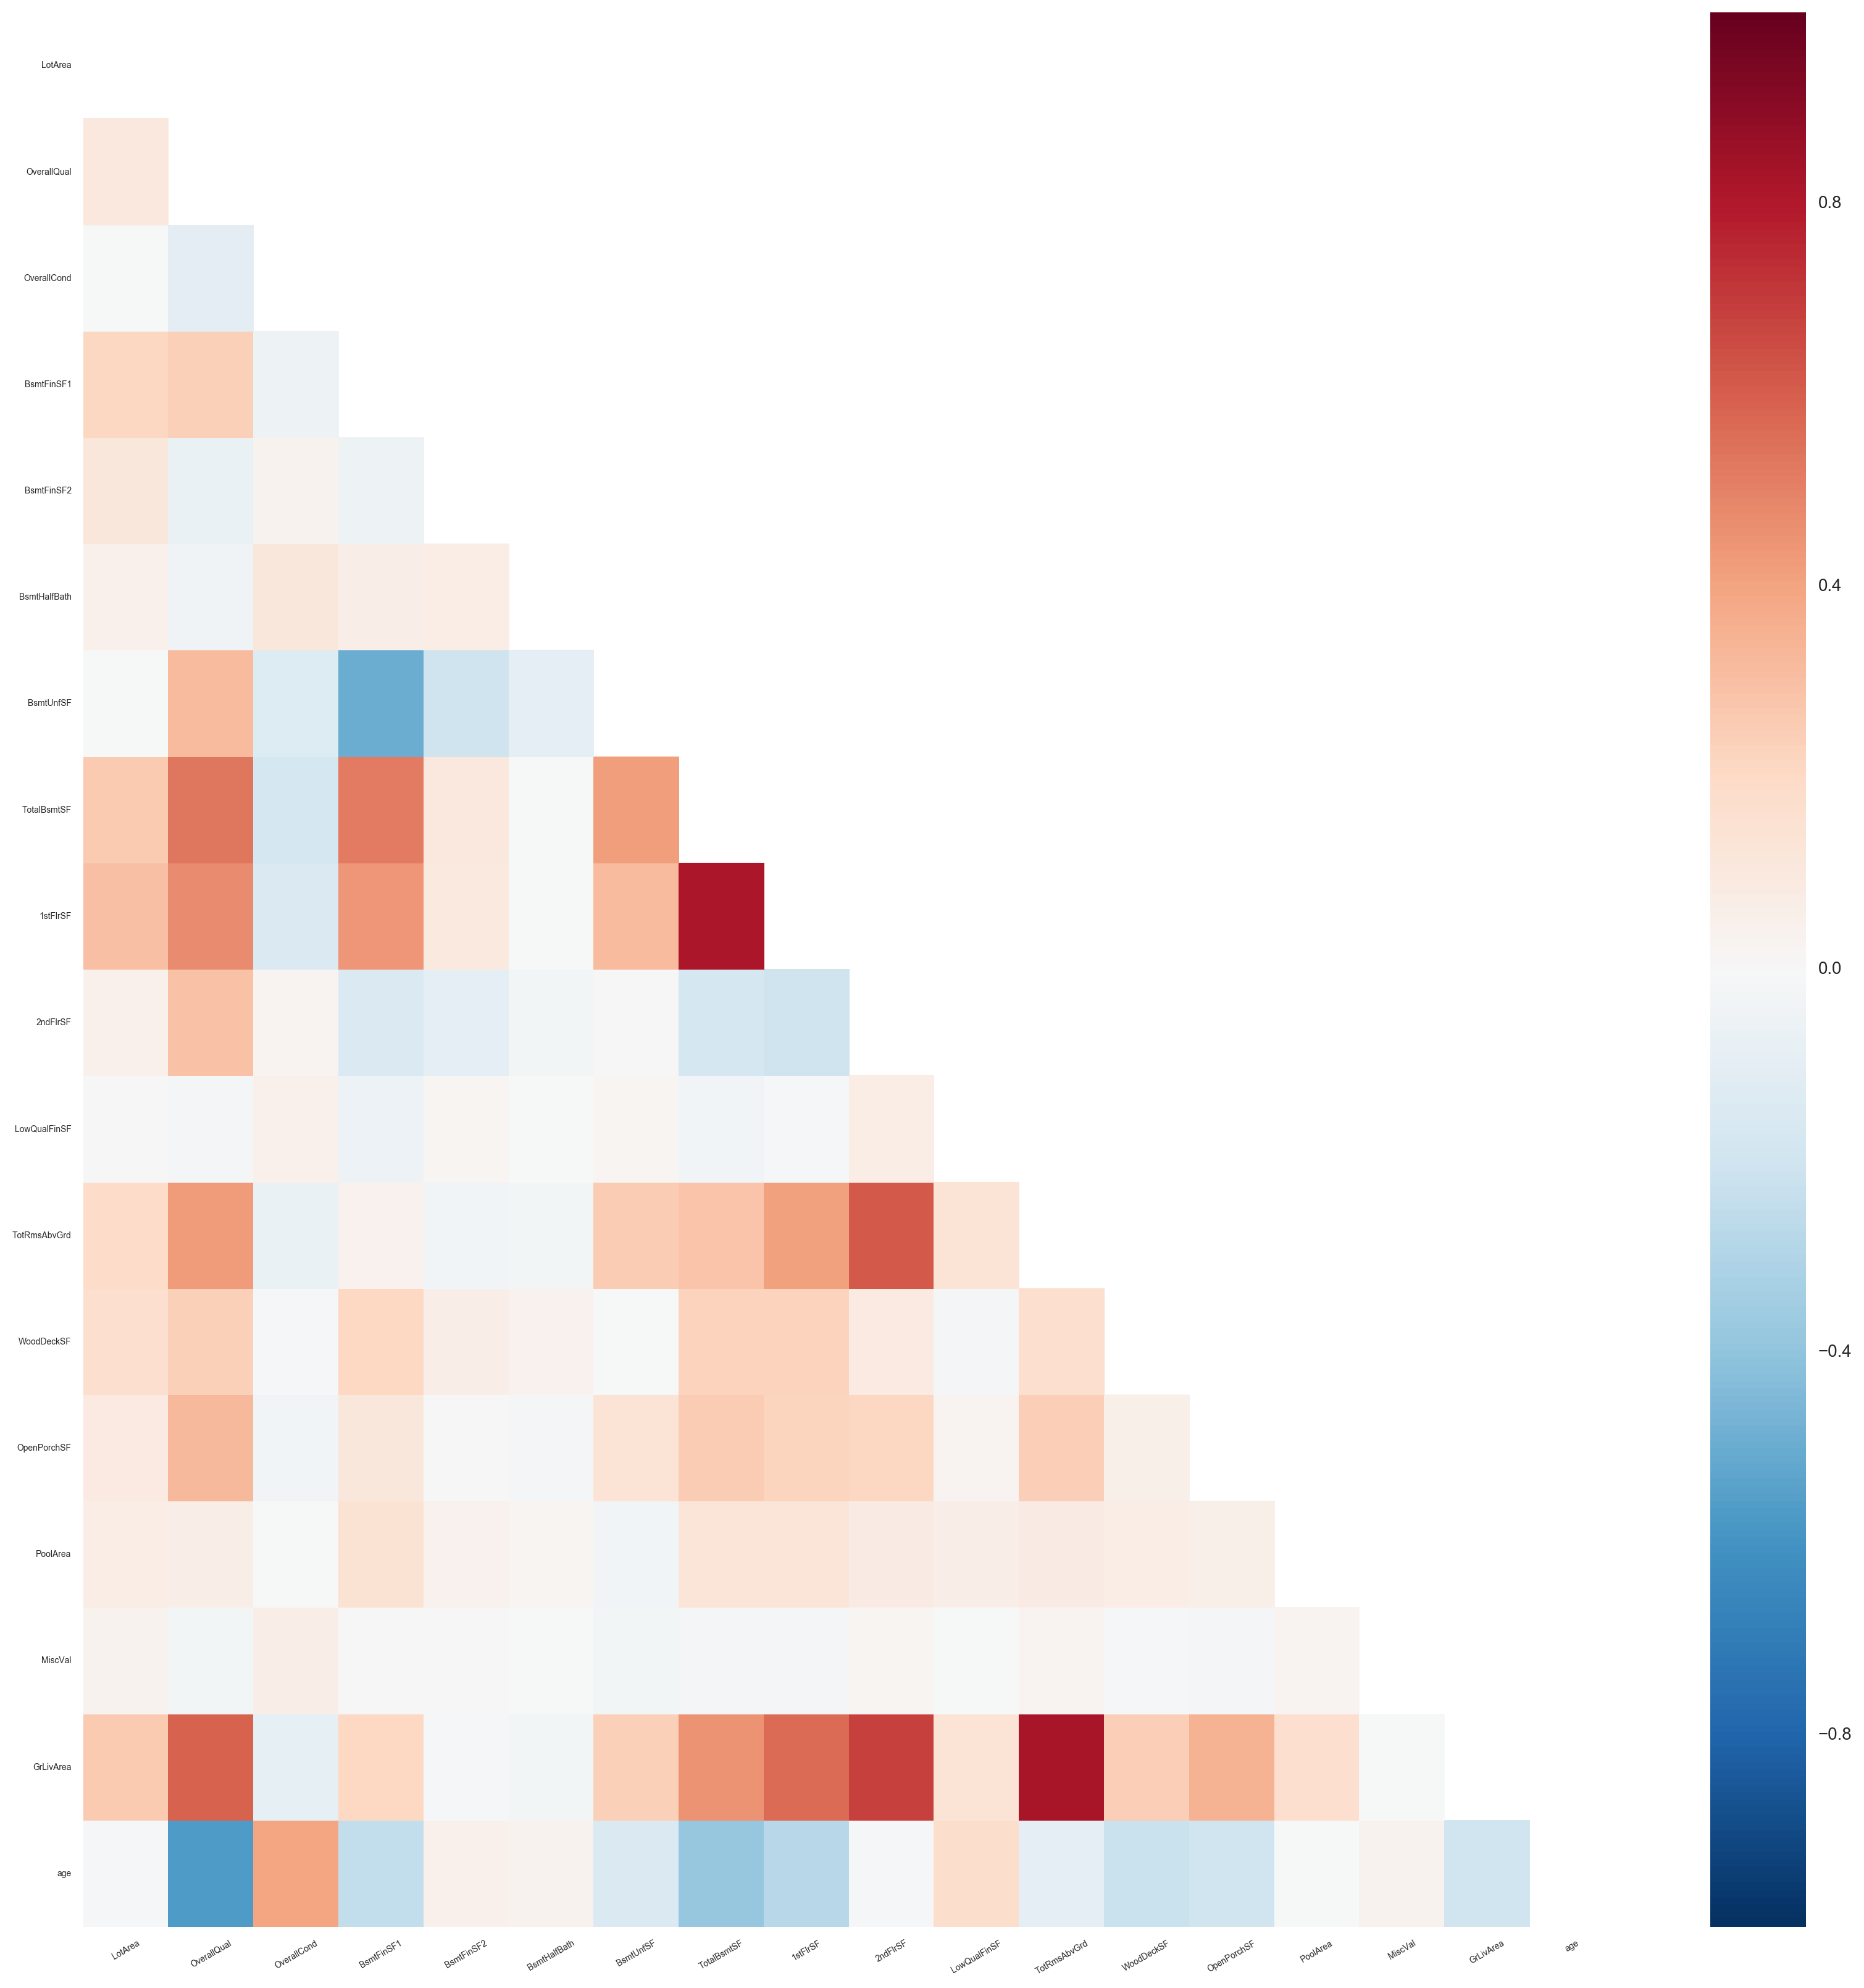

In [487]:
continuous_variable = house[['LotArea','OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtHalfBath', 'BsmtUnfSF', 
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 
           'PoolArea', 'MiscVal', 'GrLivArea', 'age']]
def correlation_heat_map(df):
    corrs = continuous_variable.corr()
    plt.rcParams['figure.figsize']=(20,20)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=False)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=5, rotation=0)
    plt.show()

correlation_heat_map(continuous_variable)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Make boxplots of categorical variables against the sale price

---

You don't have to plot all of them unless you want to. Make at least 8 boxplots looking at the distribution of sale price across levels of categorical variables in your dataset. This can be whichever categorical variables interest you the most.

Write up a few findings on the relationship between sales price and the categorical variables you chose to plot. Anything surprising?

--> based on the box plot comparing the selling price and over all quality of the houses we can see that houses rated 10 have the greatest variance and houses rated 1 and 2 as their quality have the lowest variance. As the quality of the houses increase the mean of the selling price alson increases propotional to the increase in over all quality(I find that really cool)

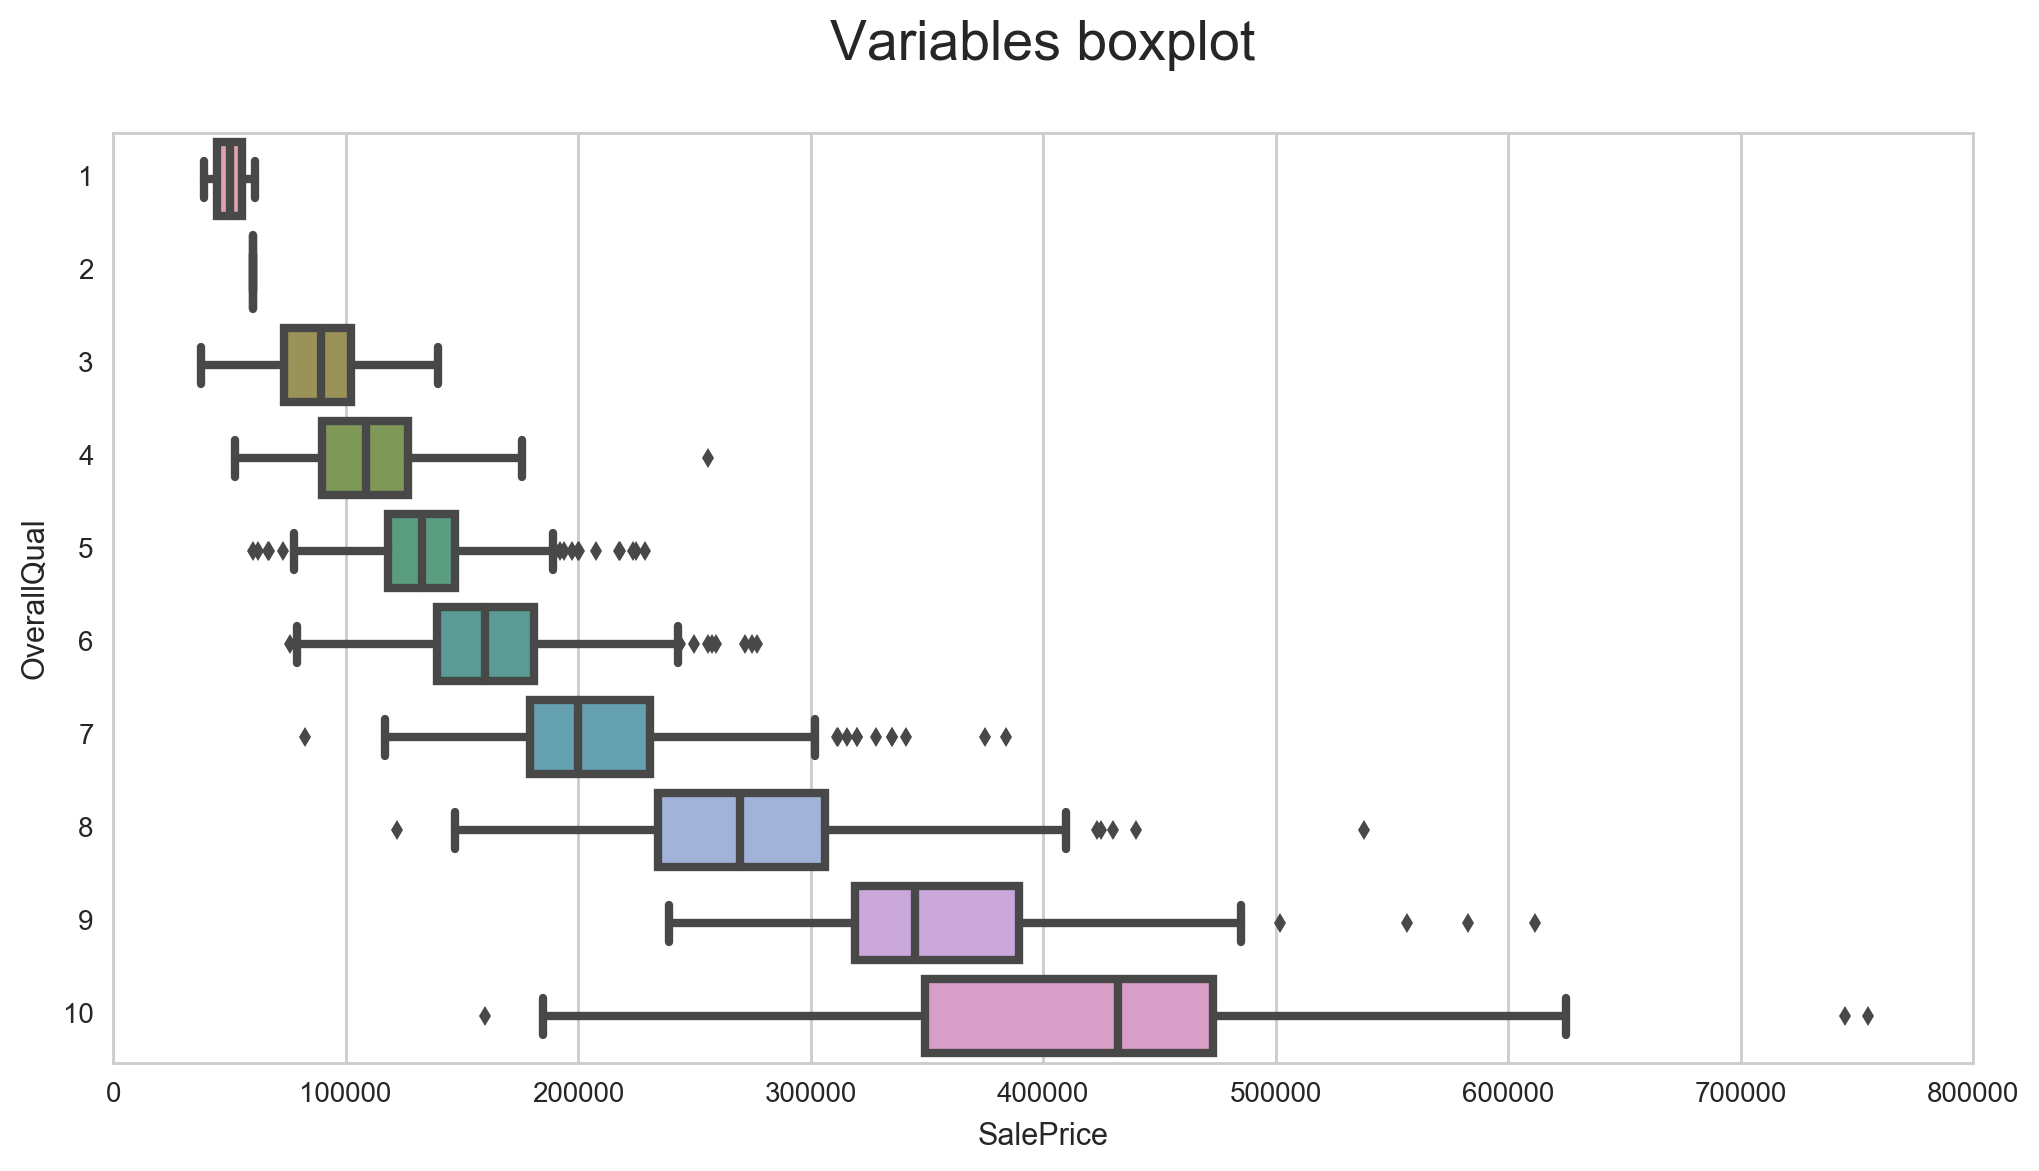

In [488]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x=house['SalePrice'], y=house['OverallQual'], orient='h', fliersize=5, linewidth=3, saturation=0.5)

ax.set_title('Variables boxplot\n', fontsize=20)
plt.show()

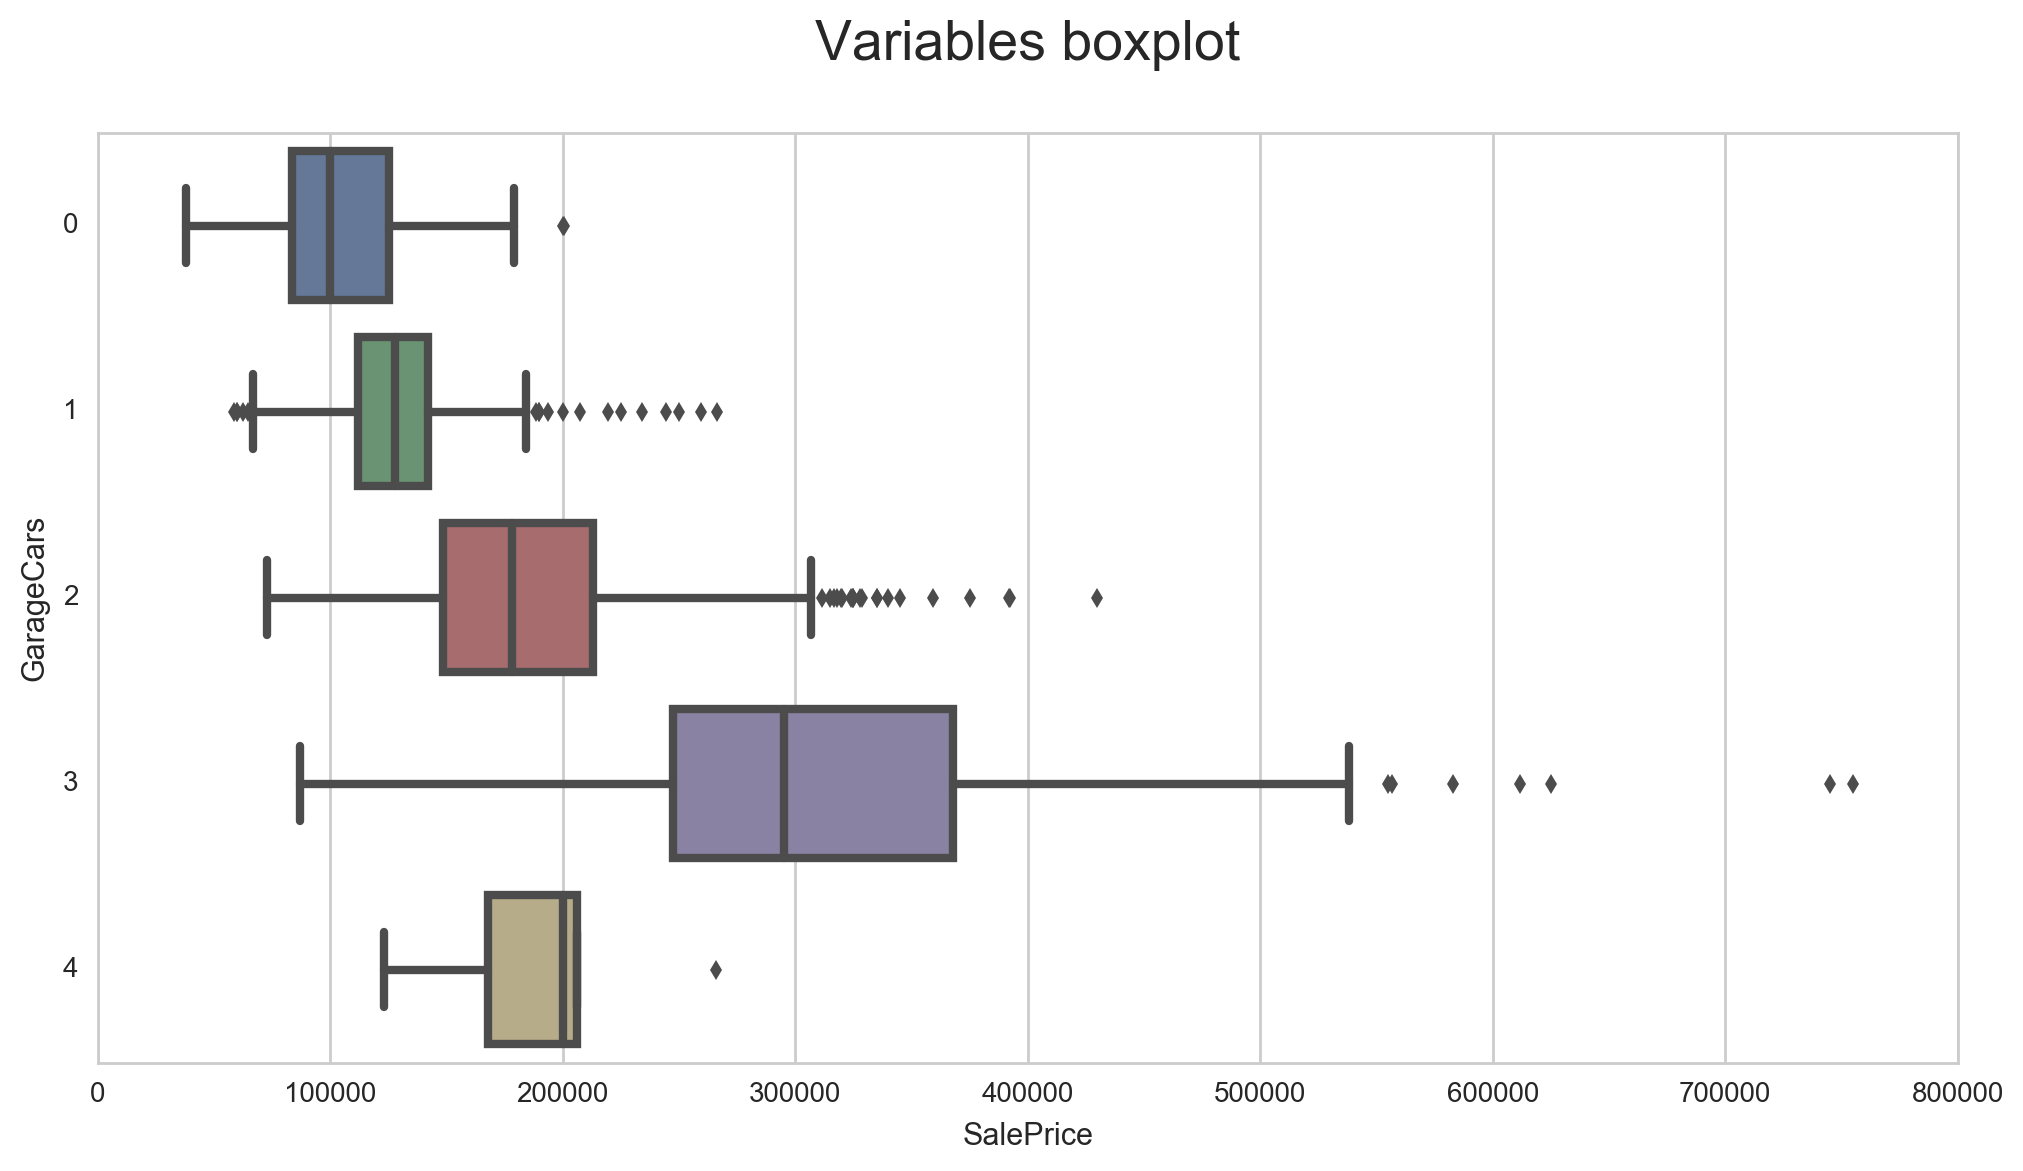

In [478]:
fig, ax = plt.subplots(figsize=(12,6))

sns.boxplot(x=house['SalePrice'], y=house['GarageCars'], orient='h', fliersize=5, linewidth=3, saturation=0.5)

ax.set_title('Variables boxplot\n', fontsize=20)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Univariate regression predicting price with statsmodels

---

### 7.1 Build a linear regression with statsmodels predicting sales price from total living area sq ft.

Print the results of the regression.


In [502]:
import statsmodels.api as sm
model = sm.OLS(house['SalePrice'],house['GrLivArea'])
results = model.fit()
results.params


GrLivArea    118.318087
dtype: float64

In [511]:
lm = linear_model.LinearRegression() 

y = house['SalePrice']
X = house['GrLivArea']

model = sm.OLS(y, X)
results = model.fit()
predictions = results.predict(X)


### 7.2 Explain the regression results

What do each of these things represent/mean?

1. The intercept coefficient.
2. The coefficient on GrLivArea.
3. The R-squared value.
4. The p-value for coefficients (P>|t|)

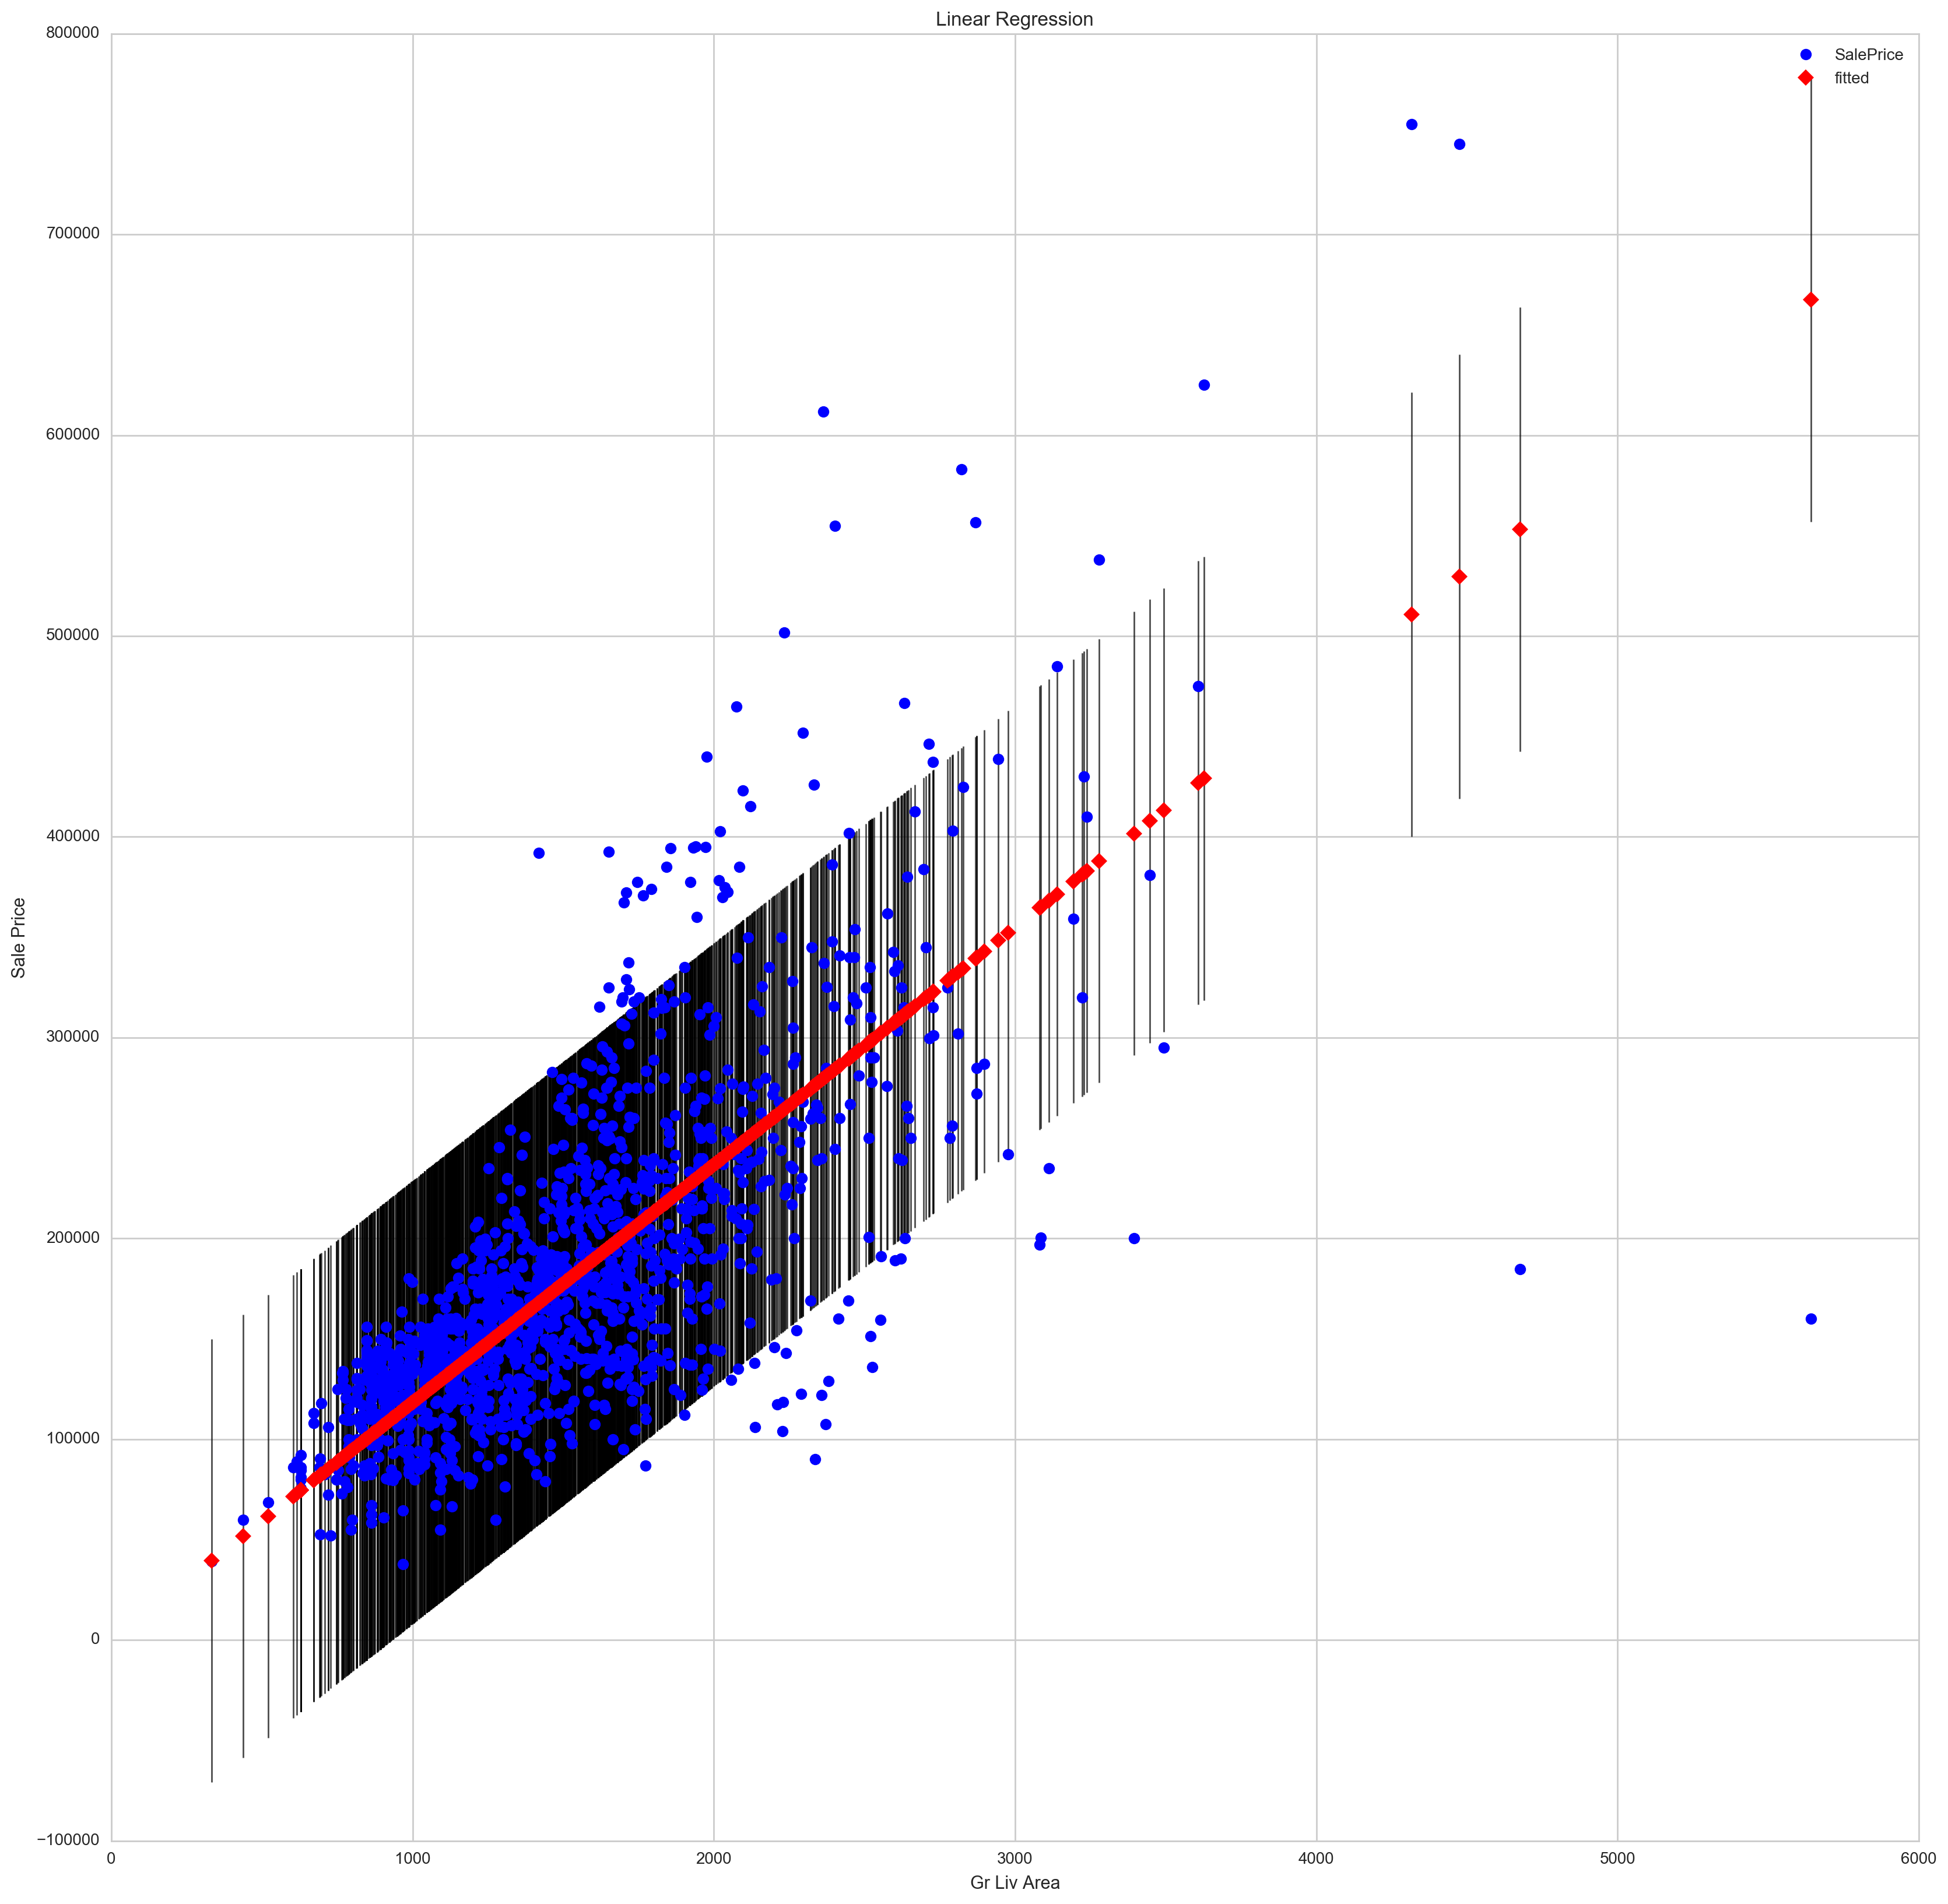

In [509]:

fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 0, ax=ax)
ax.set_ylabel("Sale Price")
ax.set_xlabel("Gr Liv Area")
ax.set_title("Linear Regression")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Multivariate regression predicting price with sklearn

---

### 8.1 Build an sklearn linear regression predicting sale price 

Use all of your continuous measures as predictors (no categorical yet).

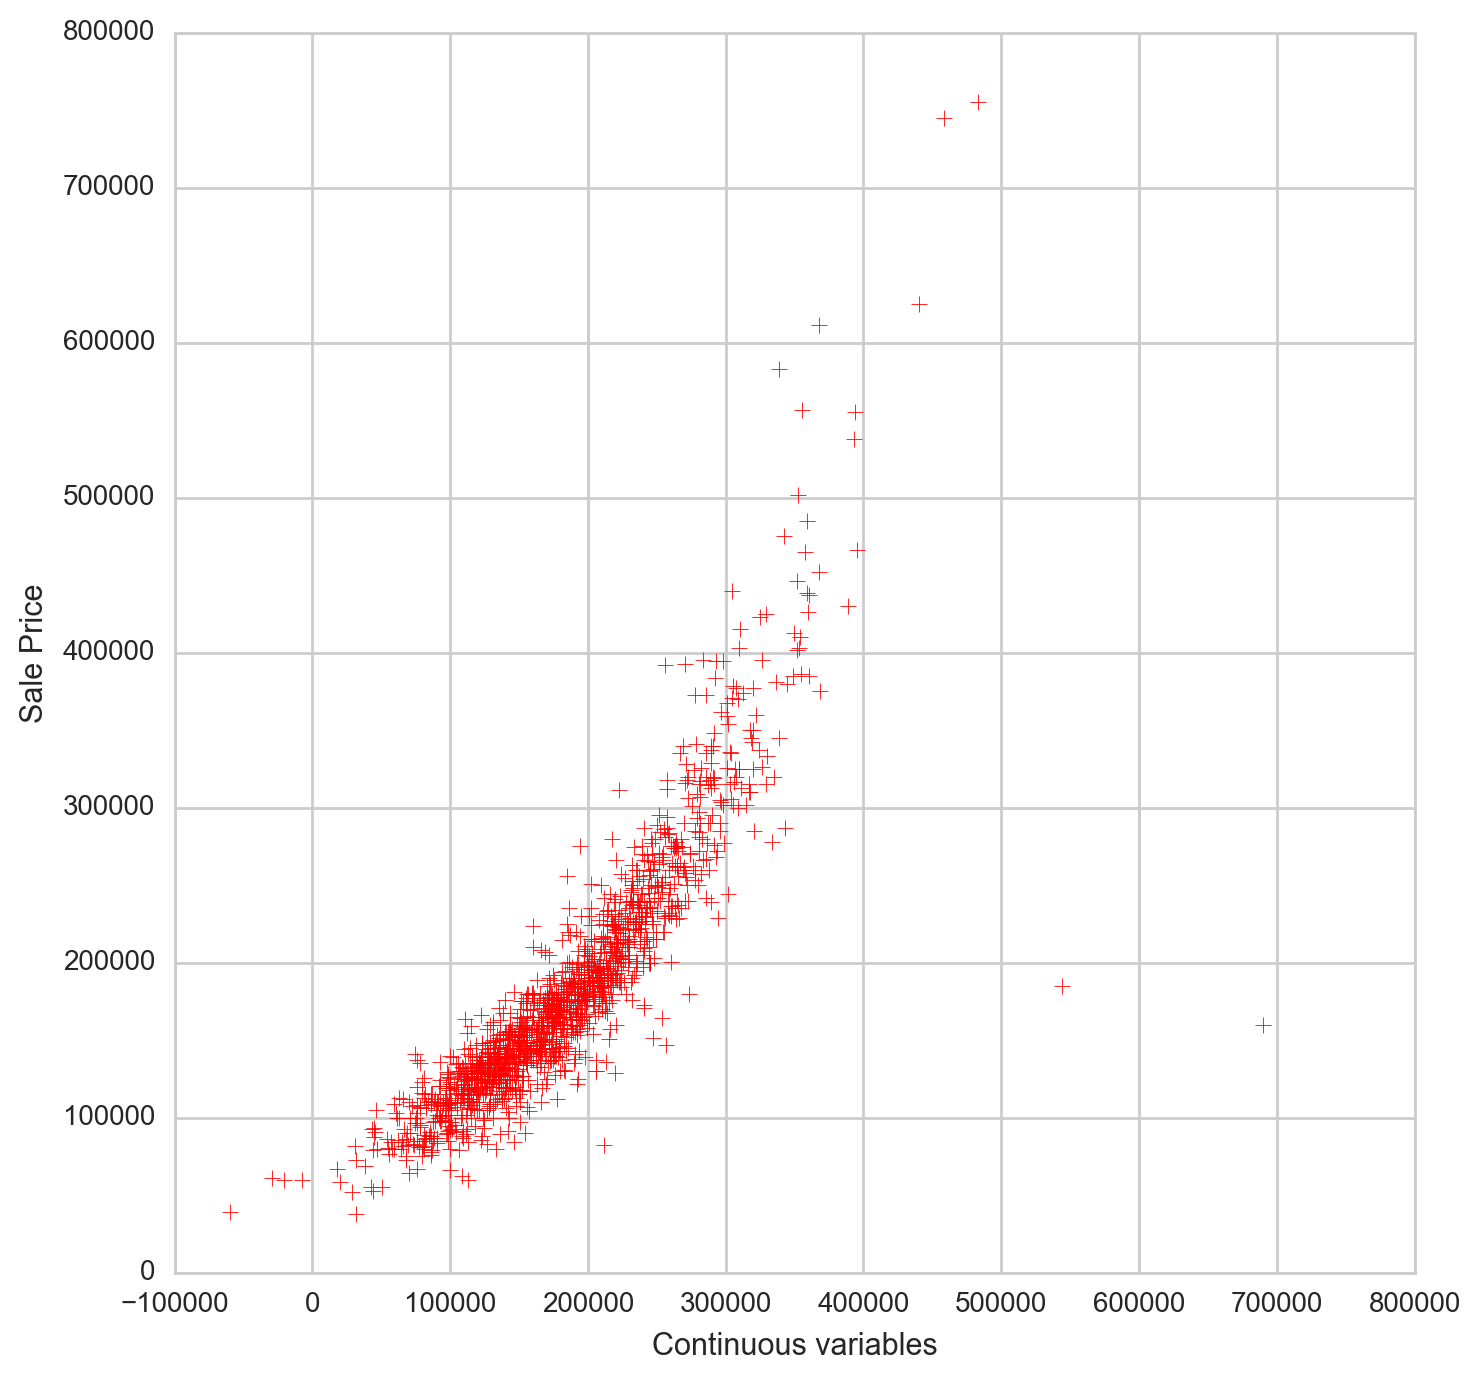

In [481]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

X = house[['LotArea','OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtHalfBath', 'BsmtUnfSF', 
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd', 'WoodDeckSF', 'OpenPorchSF', 
           'PoolArea', 'MiscVal', 'GrLivArea', 'age']]
y = house['SalePrice']

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Continuous variables")
plt.ylabel("Sale Price")
plt.show()

### 8.2 Calculate the $R^2$ of your model.

In [482]:
print "The R*2 value for the above model is:", score

The R*2 value for the above model is: 0.782540813246


### 8.3 Plot the residuals against the true values.

In [483]:
residual = house.SalePrice - predictions


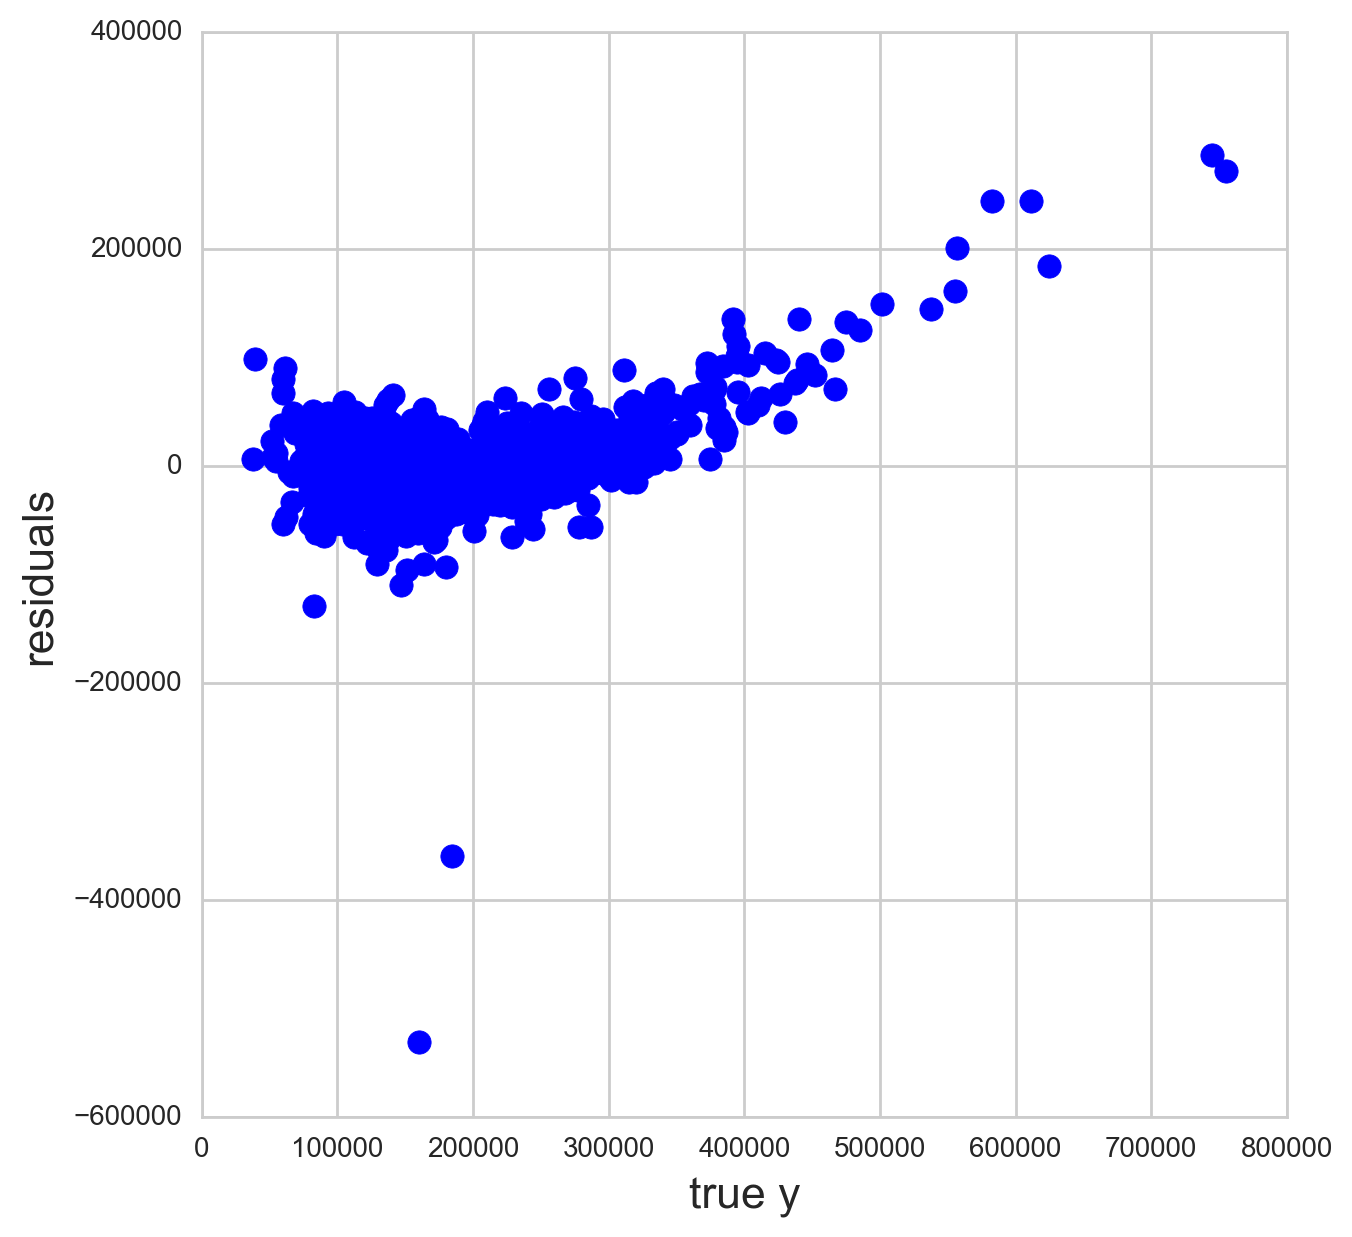

In [484]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax.scatter(house.SalePrice, residual, color='b', s=70, label='yhat - true y')

ax.set_xlabel('true y', fontsize=16)
ax.set_ylabel('residuals', fontsize=16)

plt.show()

### 8.4 Plot a histogram of the residuals.

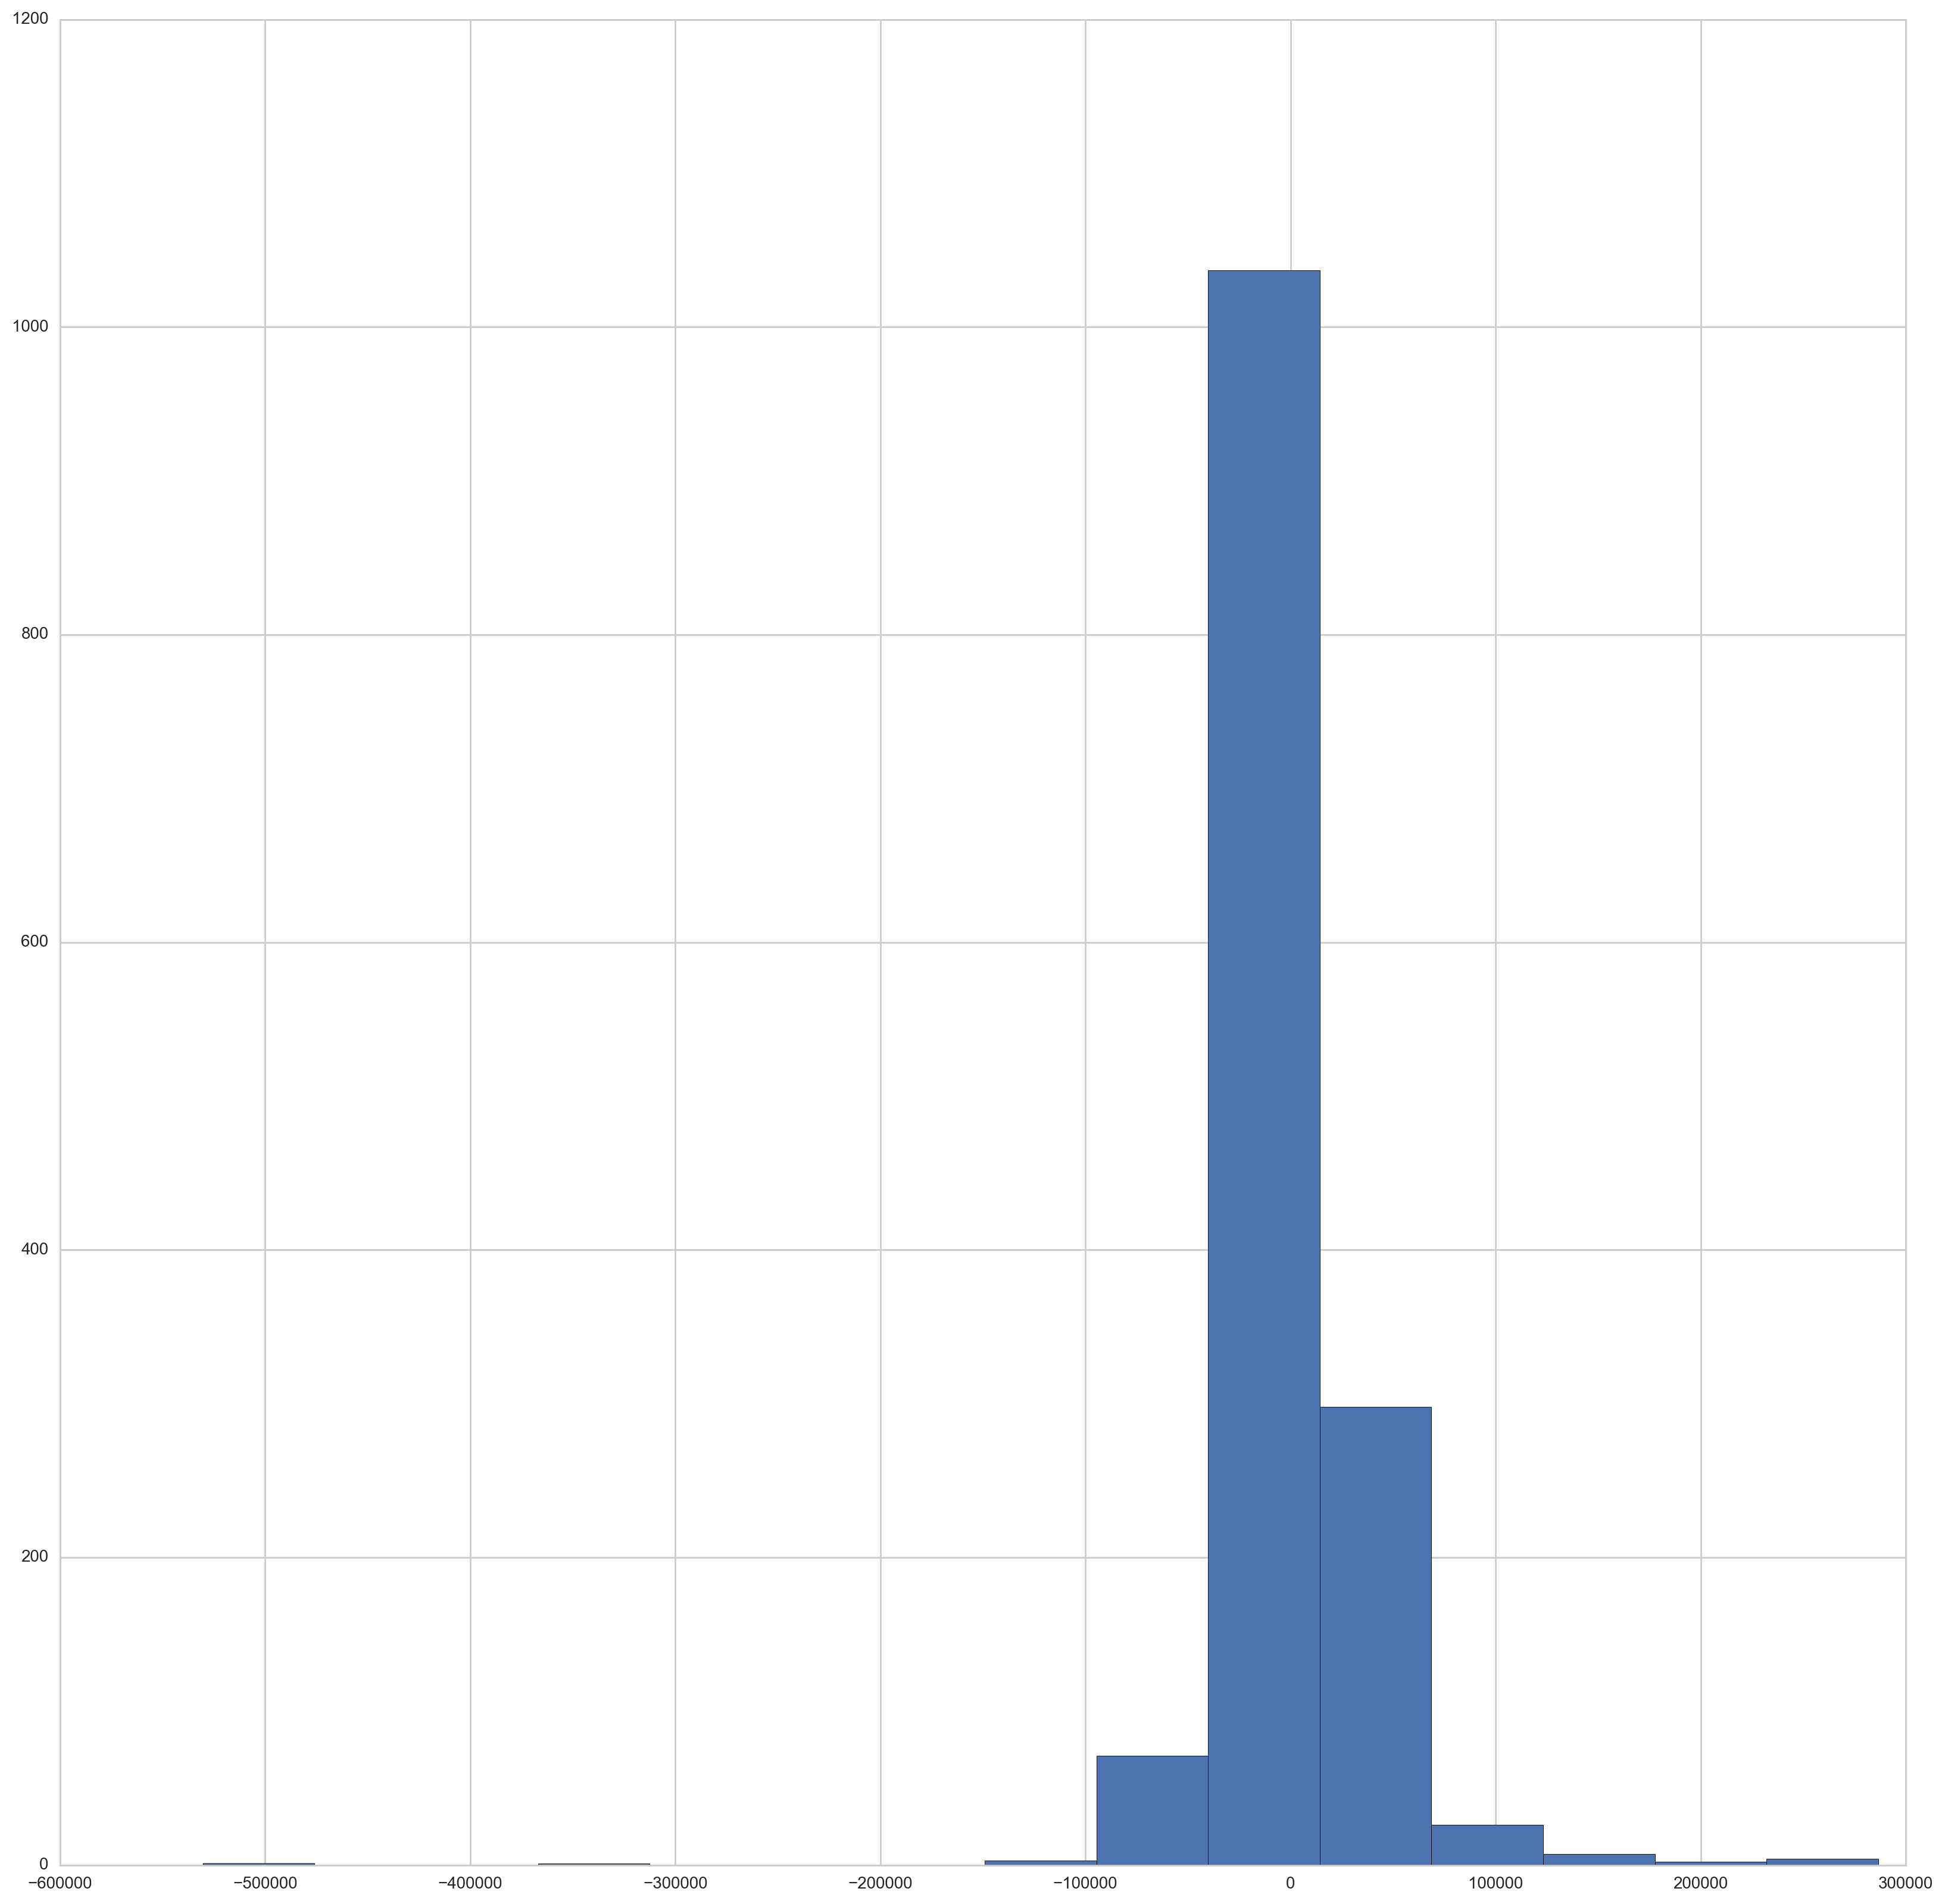

In [485]:
plt.hist(residual, bins = 15)
plt.show()

### 8.5 Make a plot to show the strength of the different coefficients.

In [290]:
model.coef_

array([  5.46542668e-01,   2.22676839e+04,   5.73901118e+03,
         1.55621144e+01,   1.47602405e-01,  -3.20655959e+03,
        -2.42755774e+00,   1.32821590e+01,   2.88950534e+01,
         1.51105585e+01,  -1.21009680e+01,   1.53126780e+03,
         3.03213927e+01,   7.65714356e+00,  -5.63954059e+01,
        -1.19645481e+00,   3.19046438e+01,  -4.78549718e+02])

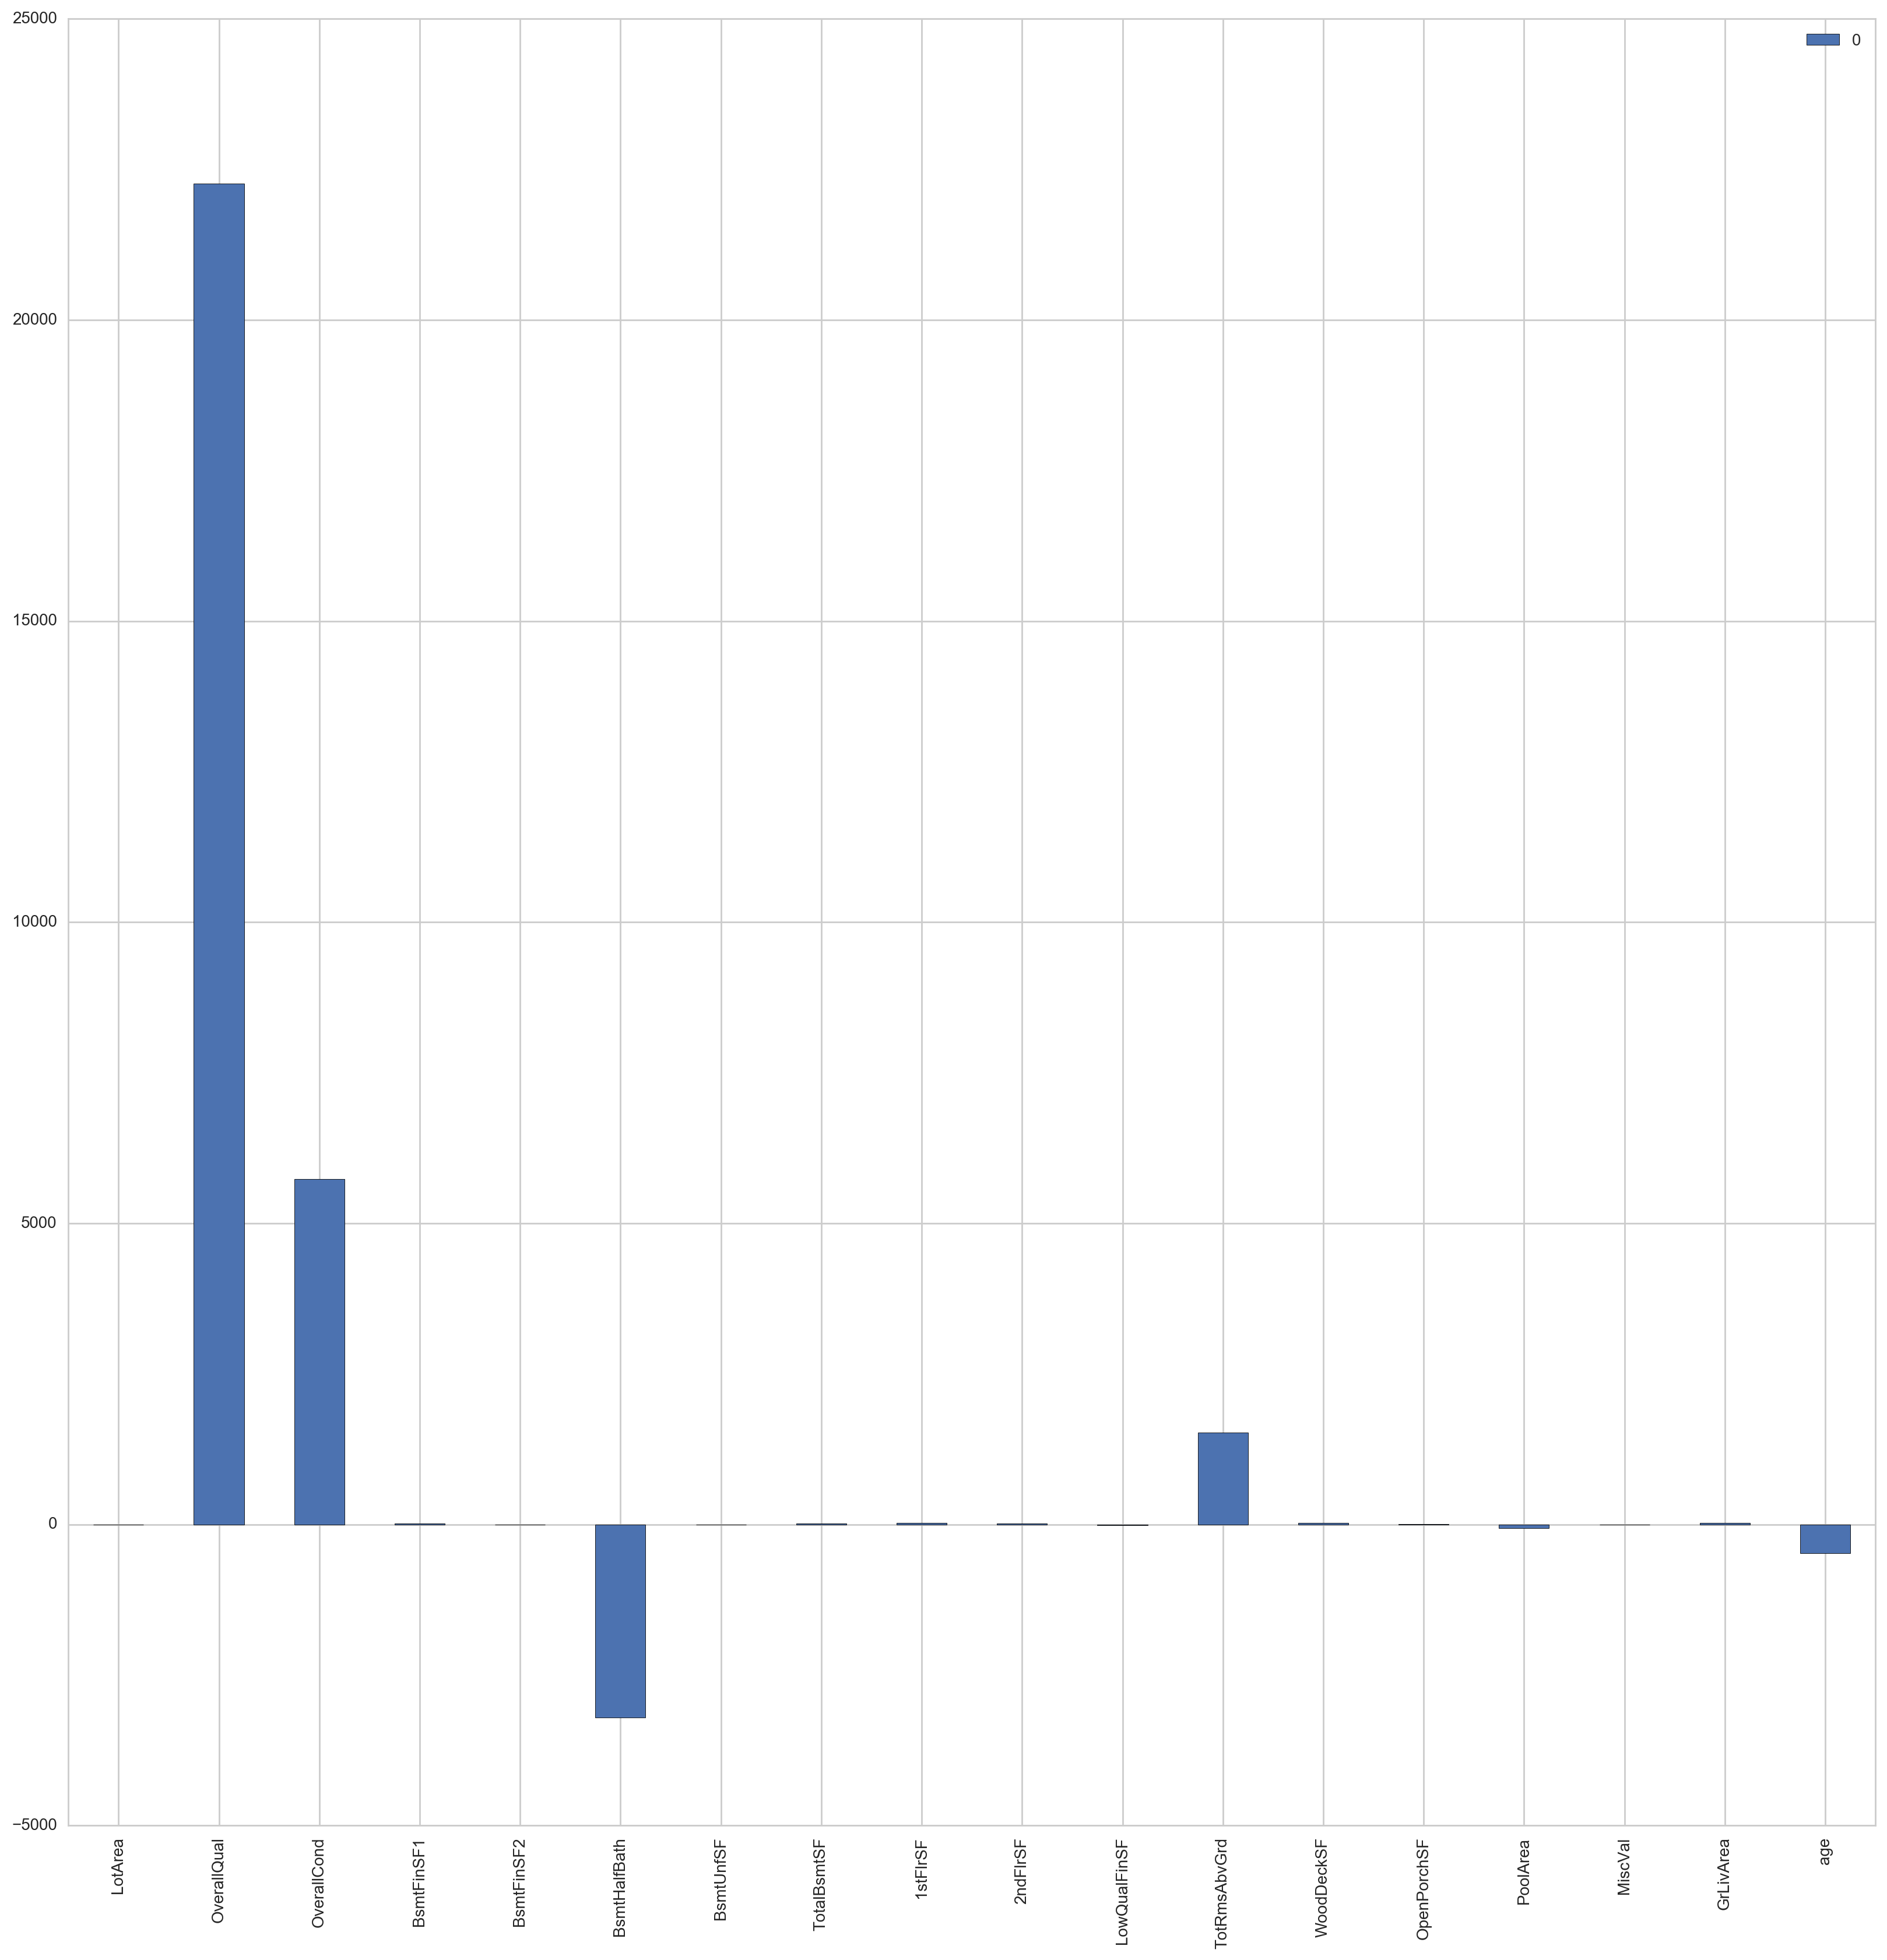

In [291]:
coefs = pd.DataFrame(model.coef_)
coefs.index = X.columns
coefs.plot(kind="bar")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Create a predictor matrix using all viable predictors available to you

---

You will need to dummy code the categorical variables. This is done most easily using patsy by constructing a formula string to make the matrix, but can be done with sklearn functions or manually as well. 

Recall that the `C(variable)` syntax in patsy formulas will take the column named `'variable'` and make it into dummy coded columns. You may also need to rename columns, patsy has trouble with column names that start with numbers.

Lastly, remember that you may need to convert your target `y` from a matrix to a vector (patsy outputs it as 2D rather than 1D, which skearn may have trouble with.)

In [292]:
import patsy
formula  =  "SalePrice ~ LotArea + OverallQual + OverallCond + BsmtFinSF1 + BsmtFinSF2 + BsmtHalfBath + \
BsmtUnfSF + TotalBsmtSF + LowQualFinSF + TotRmsAbvGrd + WoodDeckSF +OpenPorchSF + PoolArea + \
MiscVal + GrLivArea + age + MSZoning + Street +LotShape + LandContour + Utilities + LotConfig + LandSlope + \
Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + \
MasVnrType + ExterQual + ExterCond + Foundation+ BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + \
Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + FireplaceQu + GarageType + GarageFinish +\
GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition - 1"
y, X     =  patsy.dmatrices(formula, data=house, return_type="dataframe")


In [293]:
pd.get_dummies(X).head(5)

,MSZoning[C (all)],MSZoning[FV],MSZoning[RH],MSZoning[RL],MSZoning[RM],Street[T.Pave],LotShape[T.IR2],LotShape[T.IR3],LotShape[T.Reg],LandContour[T.HLS],...,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,TotRmsAbvGrd,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,GrLivArea,age
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,150.0,856.0,0.0,8.0,0.0,61.0,0.0,0.0,1710.0,5.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,284.0,1262.0,0.0,6.0,298.0,0.0,0.0,0.0,1262.0,31.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,434.0,920.0,0.0,6.0,0.0,42.0,0.0,0.0,1786.0,7.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,540.0,756.0,0.0,7.0,0.0,35.0,0.0,0.0,1717.0,91.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,490.0,1145.0,0.0,9.0,192.0,84.0,0.0,0.0,2198.0,8.0


In [294]:
house.GrLivArea.head(5)

0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64

### 9.2 Fit a linear regression using all of the predictors and score it.

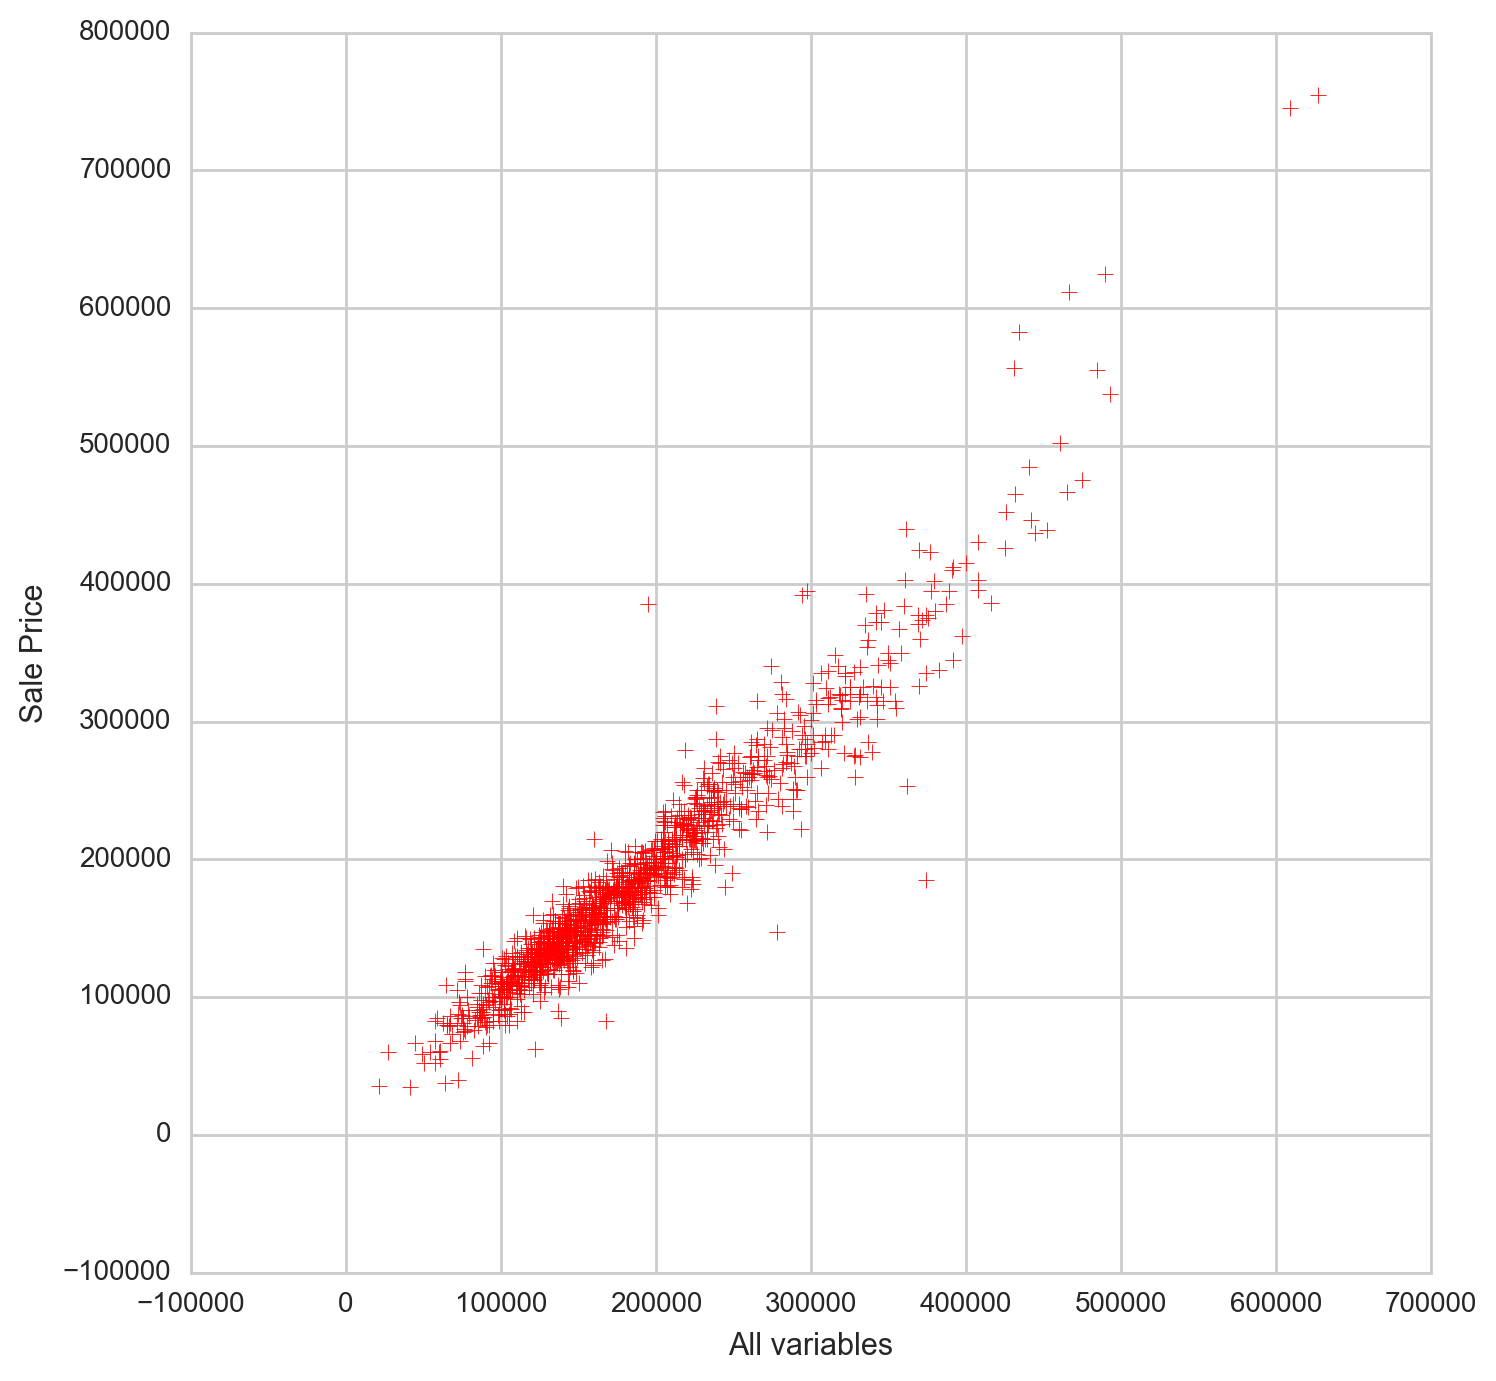

In [295]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

model        =  lm.fit(X, y)
predictions  =  model.predict(X)
score        =  model.score(X, y)

plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("All variables")
plt.ylabel("Sale Price")
plt.show()

In [296]:
print "The R*2 value for the above model is:", score

The R*2 value for the above model is: 0.925220946435


### 9.3 Explain why this model and associated $R^2$ score may not be as "good" as they seem.

The R^2 value might be affect by added noise caused by the increase in variables. Potential correlations within variables could also lead to a strong R^2 value. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 10. Cross-validate the model

---

Use 20 folds and calculate the average $R^2$ of your model that has all of the predictors in it.

Cross-validated scores: [ 0.90664738 -1.53703518  0.86614459 -0.63335241  0.91850463  0.89568595
  0.93006349  0.45588207  0.91026457  0.88791993  0.87840397  0.01259649
  0.89885717  0.87511441  0.86699415  0.89185301  0.86643368 -0.66261697
  0.85967142  0.93126611]
Mean of Cross Validation: 0.550964922883
Cross-Predicted Accuracy: 0.668441657122


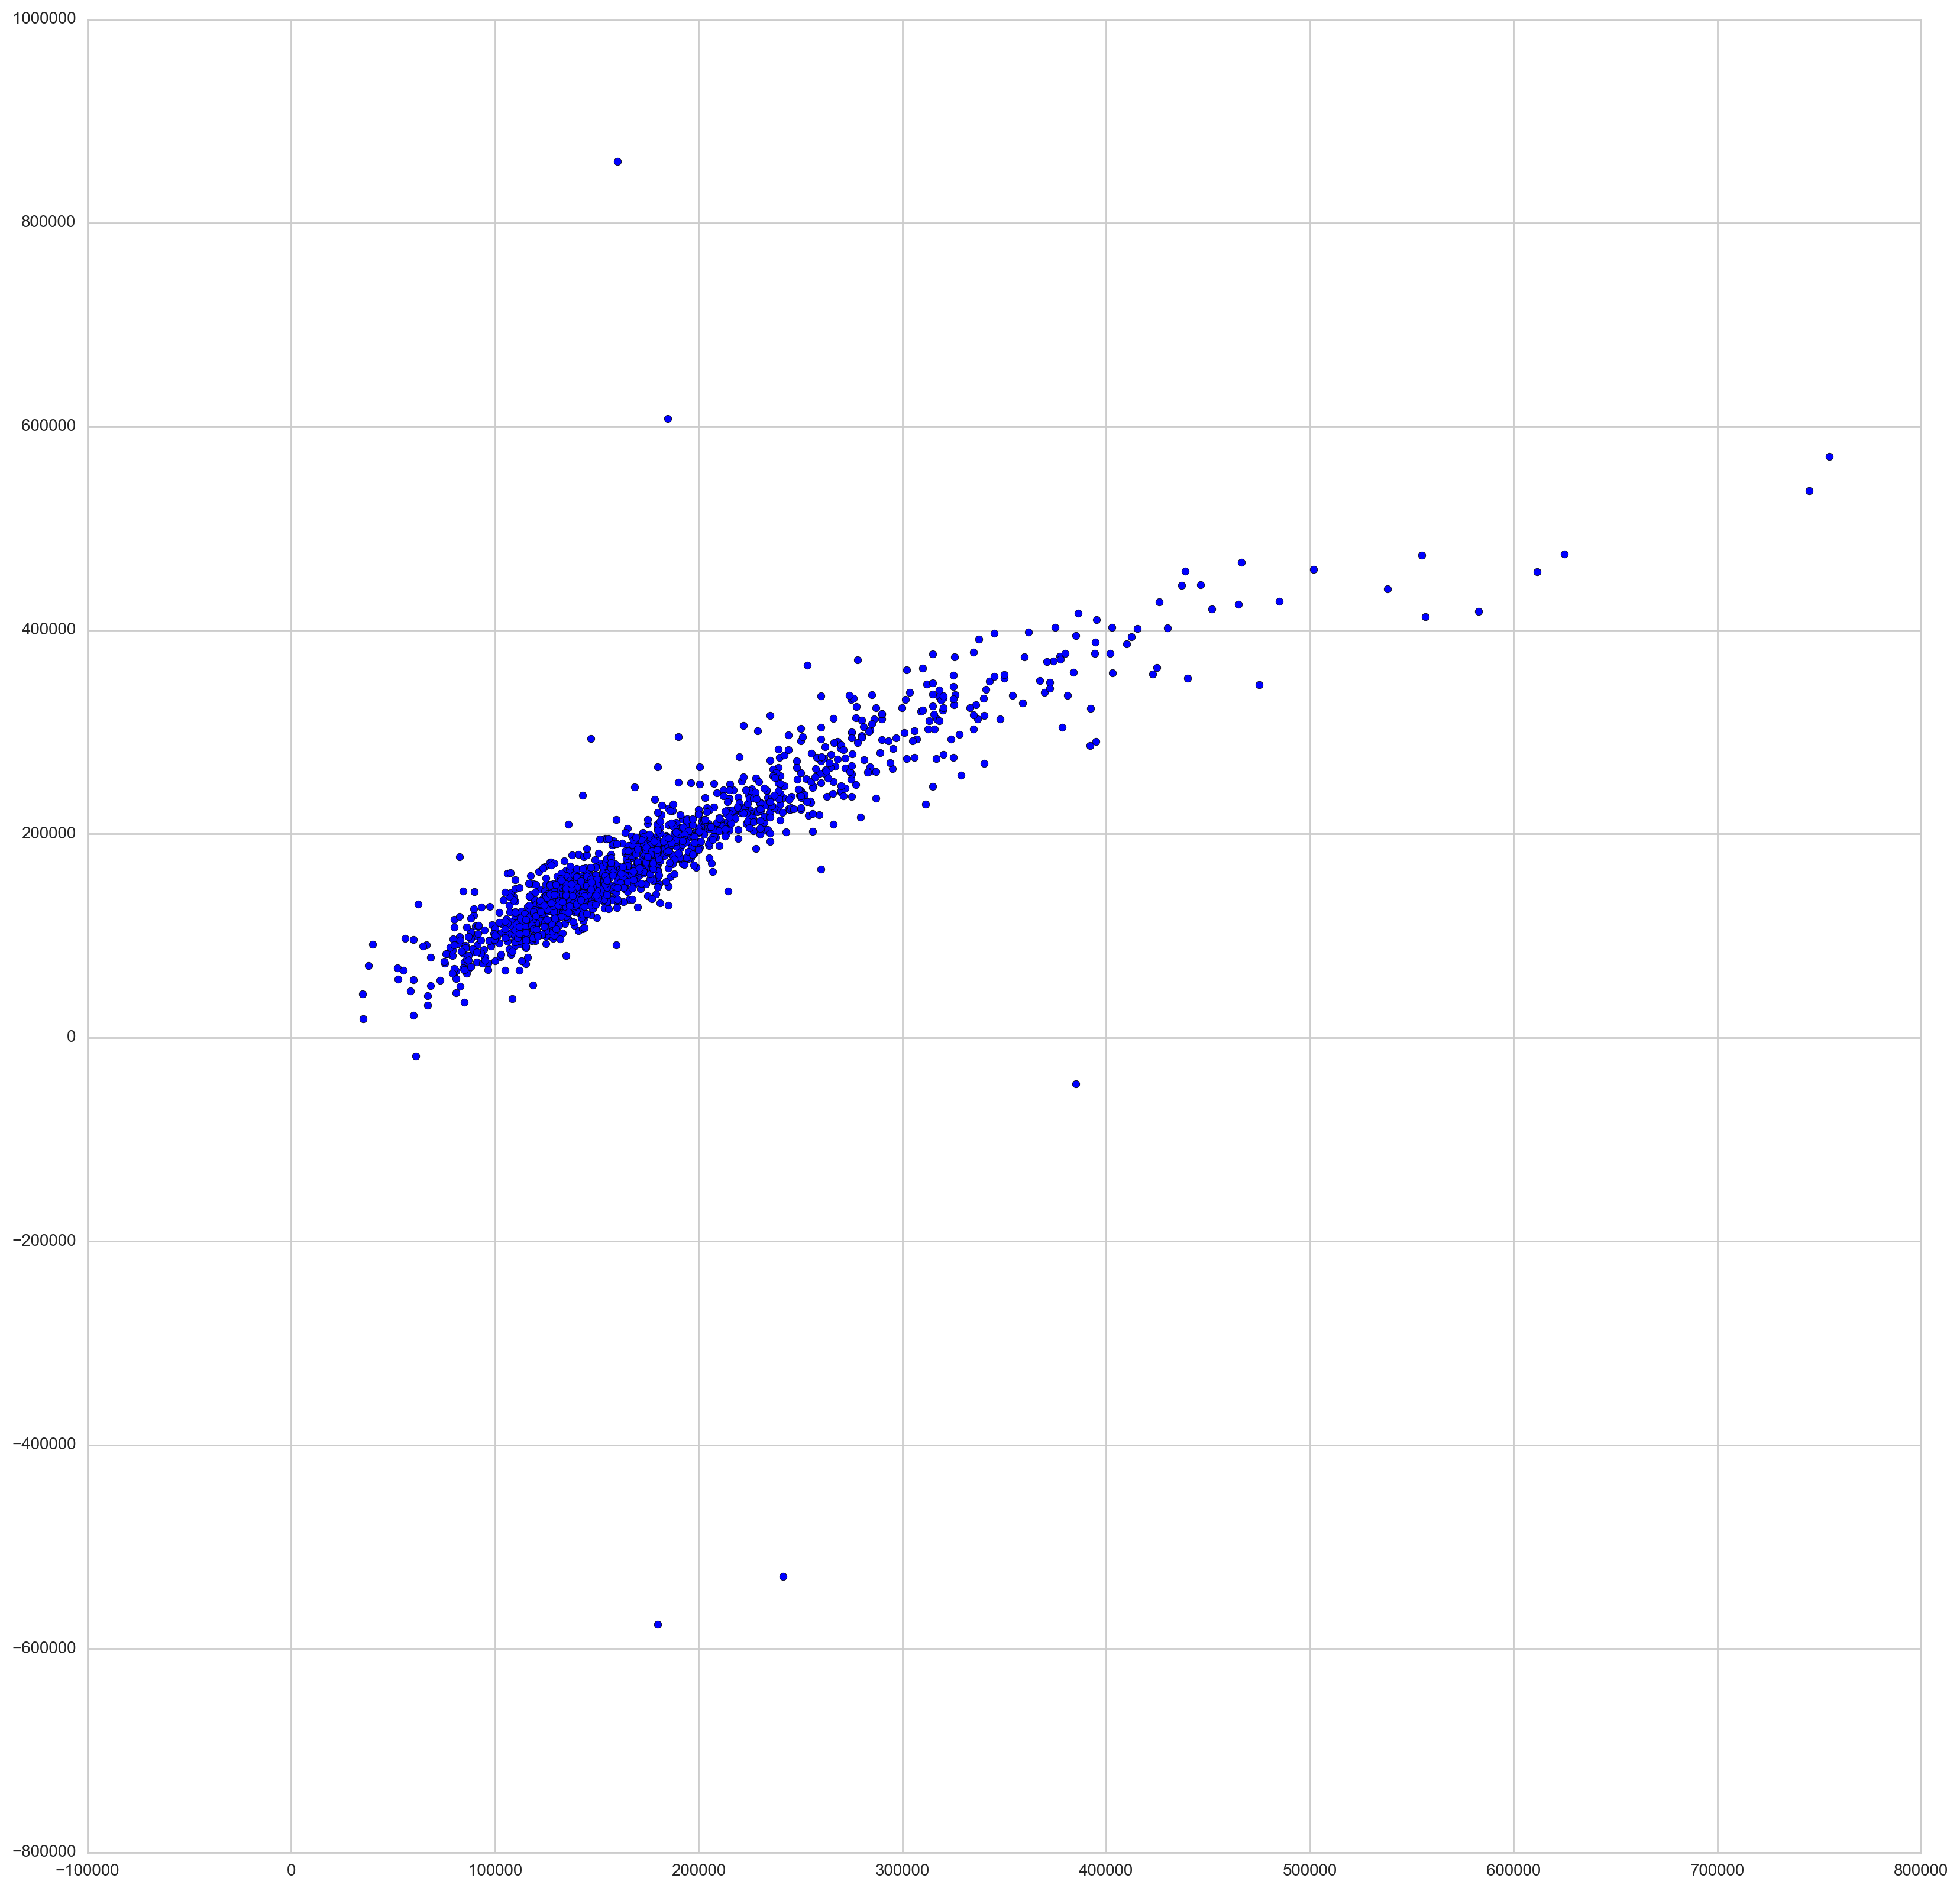

In [297]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 20-fold cross validation
scores = cross_val_score(model, X, y, cv=20)
print "Cross-validated scores:", scores
print "Mean of Cross Validation:", scores.mean()

# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=20)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)

print "Cross-Predicted Accuracy:", accuracy

### 10.2 What does the cross-validated average $R^2$ tell you?

--> The R^2 in this case tells us the strength of our model after we separate our testing and training dataset into 20 different folds.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10.3 When can you have a negative $R^2$ score? Explain what it means.


--> We can have a negative R2 if the predicted model does not follow the trend of the actual data set. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 11. Construct a Lasso regression and find the optimal regularization strength


---

Now you'll fit a Lasso regression using again the full predictor matrix. 

### 11.1 Using either `LassoCV` or `GridSearchCV` with `Lasso`, find the optimal regularization strength.

You are finding the best `alpha` to use with this data. For `LassoCV` you can use the `n_alphas` parameter to specify how many possible alphas you want the model to search over. With `GridSearchCV` you will have to give it a vector of the alphas you want to try.

Note that in both cases you will need to specify the number of cross-validation folds `cv`. 10 is generally a good number of folds. 

**Remember that you must standardize your predictor matrix when using regularization!**

In [298]:
# Initialize the StandardScaler object
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_trans = ss.fit_transform(X)


In [299]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_trans, y)

print optimal_lasso.alpha_

/Users/roshkhadka/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1051: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

724.761060468


....[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.5s finished


### 11.2 Construct a `Lasso` model with the optimal `alpha` and cross-validate the $R^2$.

In [300]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_trans, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.90755536  0.90753416  0.90387628  0.76888506  0.88184278  0.76271681
  0.86999802  0.85042726  0.50089721  0.88386345]
0.823759639944


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 11.3 Explain the effect of the Lasso regularization and why it can be useful.

--> Lasso regularization penalizes variables with lower variance and coefficient. It is useful when we want to eliminate the effect of variables with low variance and correlation to our overall regression model. 

### 11.4 Print out the variables with non-zero Lasso coefficients (with the coefficient).

How many variables remain? 

Tell a (brief) story about what is important for estimating price based on the variables and their coefficients. Just pick out the things most interesting to you.

In [312]:
lasso.fit(X_trans, y)

Lasso(alpha=724.76106046840948, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [334]:

lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

With_co_eff_non_zero = lasso_coefs[lasso_coefs.coef > 0]
print With_co_eff_non_zero.head(5)
print '\n'
print "Variables with non-zero Lasso coefficients:", With_co_eff_non_zero.count()


         abs_coef          coef                 variable
224  28766.862284  28766.862284                GrLivArea
211  16565.658378  16565.658378              OverallQual
34    9425.520868   9425.520868  Neighborhood[T.NridgHt]
33    7528.813847   7528.813847  Neighborhood[T.NoRidge]
80    6144.671009   6144.671009      RoofMatl[T.WdShngl]


Variables with non-zero Lasso coefficients: abs_coef    47
coef        47
variable    47
dtype: int64


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 12. Construct a Ridge regression and find the optimal regularization strength

---

### 12.1 Create a predictor matrix of only variables related to sq. ft.

**Remember that you must standardize your predictor matrix before using Ridge regularization.**

In [361]:
sqft_df = X[['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', \
            'WoodDeckSF', 'OpenPorchSF','PoolArea', 'LotArea','BsmtFinSF1', 'BsmtFinSF2', \
            'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF',
            'WoodDeckSF', 'OpenPorchSF', 'LotArea']]

# LotArea + OverallQual + OverallCond + BsmtFinSF1 + BsmtFinSF2 + BsmtHalfBath + \
# BsmtUnfSF + TotalBsmtSF + LowQualFinSF + TotRmsAbvGrd + WoodDeckSF +OpenPorchSF + PoolArea + \
# MiscVal + GrLivArea + age + MSZoning + Street +LotShape + LandContour + Utilities + LotConfig + LandSlope + \
# Neighborhood + Condition1 + Condition2 + BldgType + HouseStyle + RoofStyle + RoofMatl + Exterior1st + Exterior2nd + \
# MasVnrType + ExterQual + ExterCond + Foundation+ BsmtQual + BsmtCond + BsmtExposure + BsmtFinType1 + BsmtFinType2 + \
# Heating + HeatingQC + CentralAir + Electrical + KitchenQual + Functional + FireplaceQu + GarageType + GarageFinish +\
# GarageQual + GarageCond + PavedDrive + SaleType + SaleCondition


### 12.2 Plot a correlation matrix of your predictors. Why might Ridge be useful here?

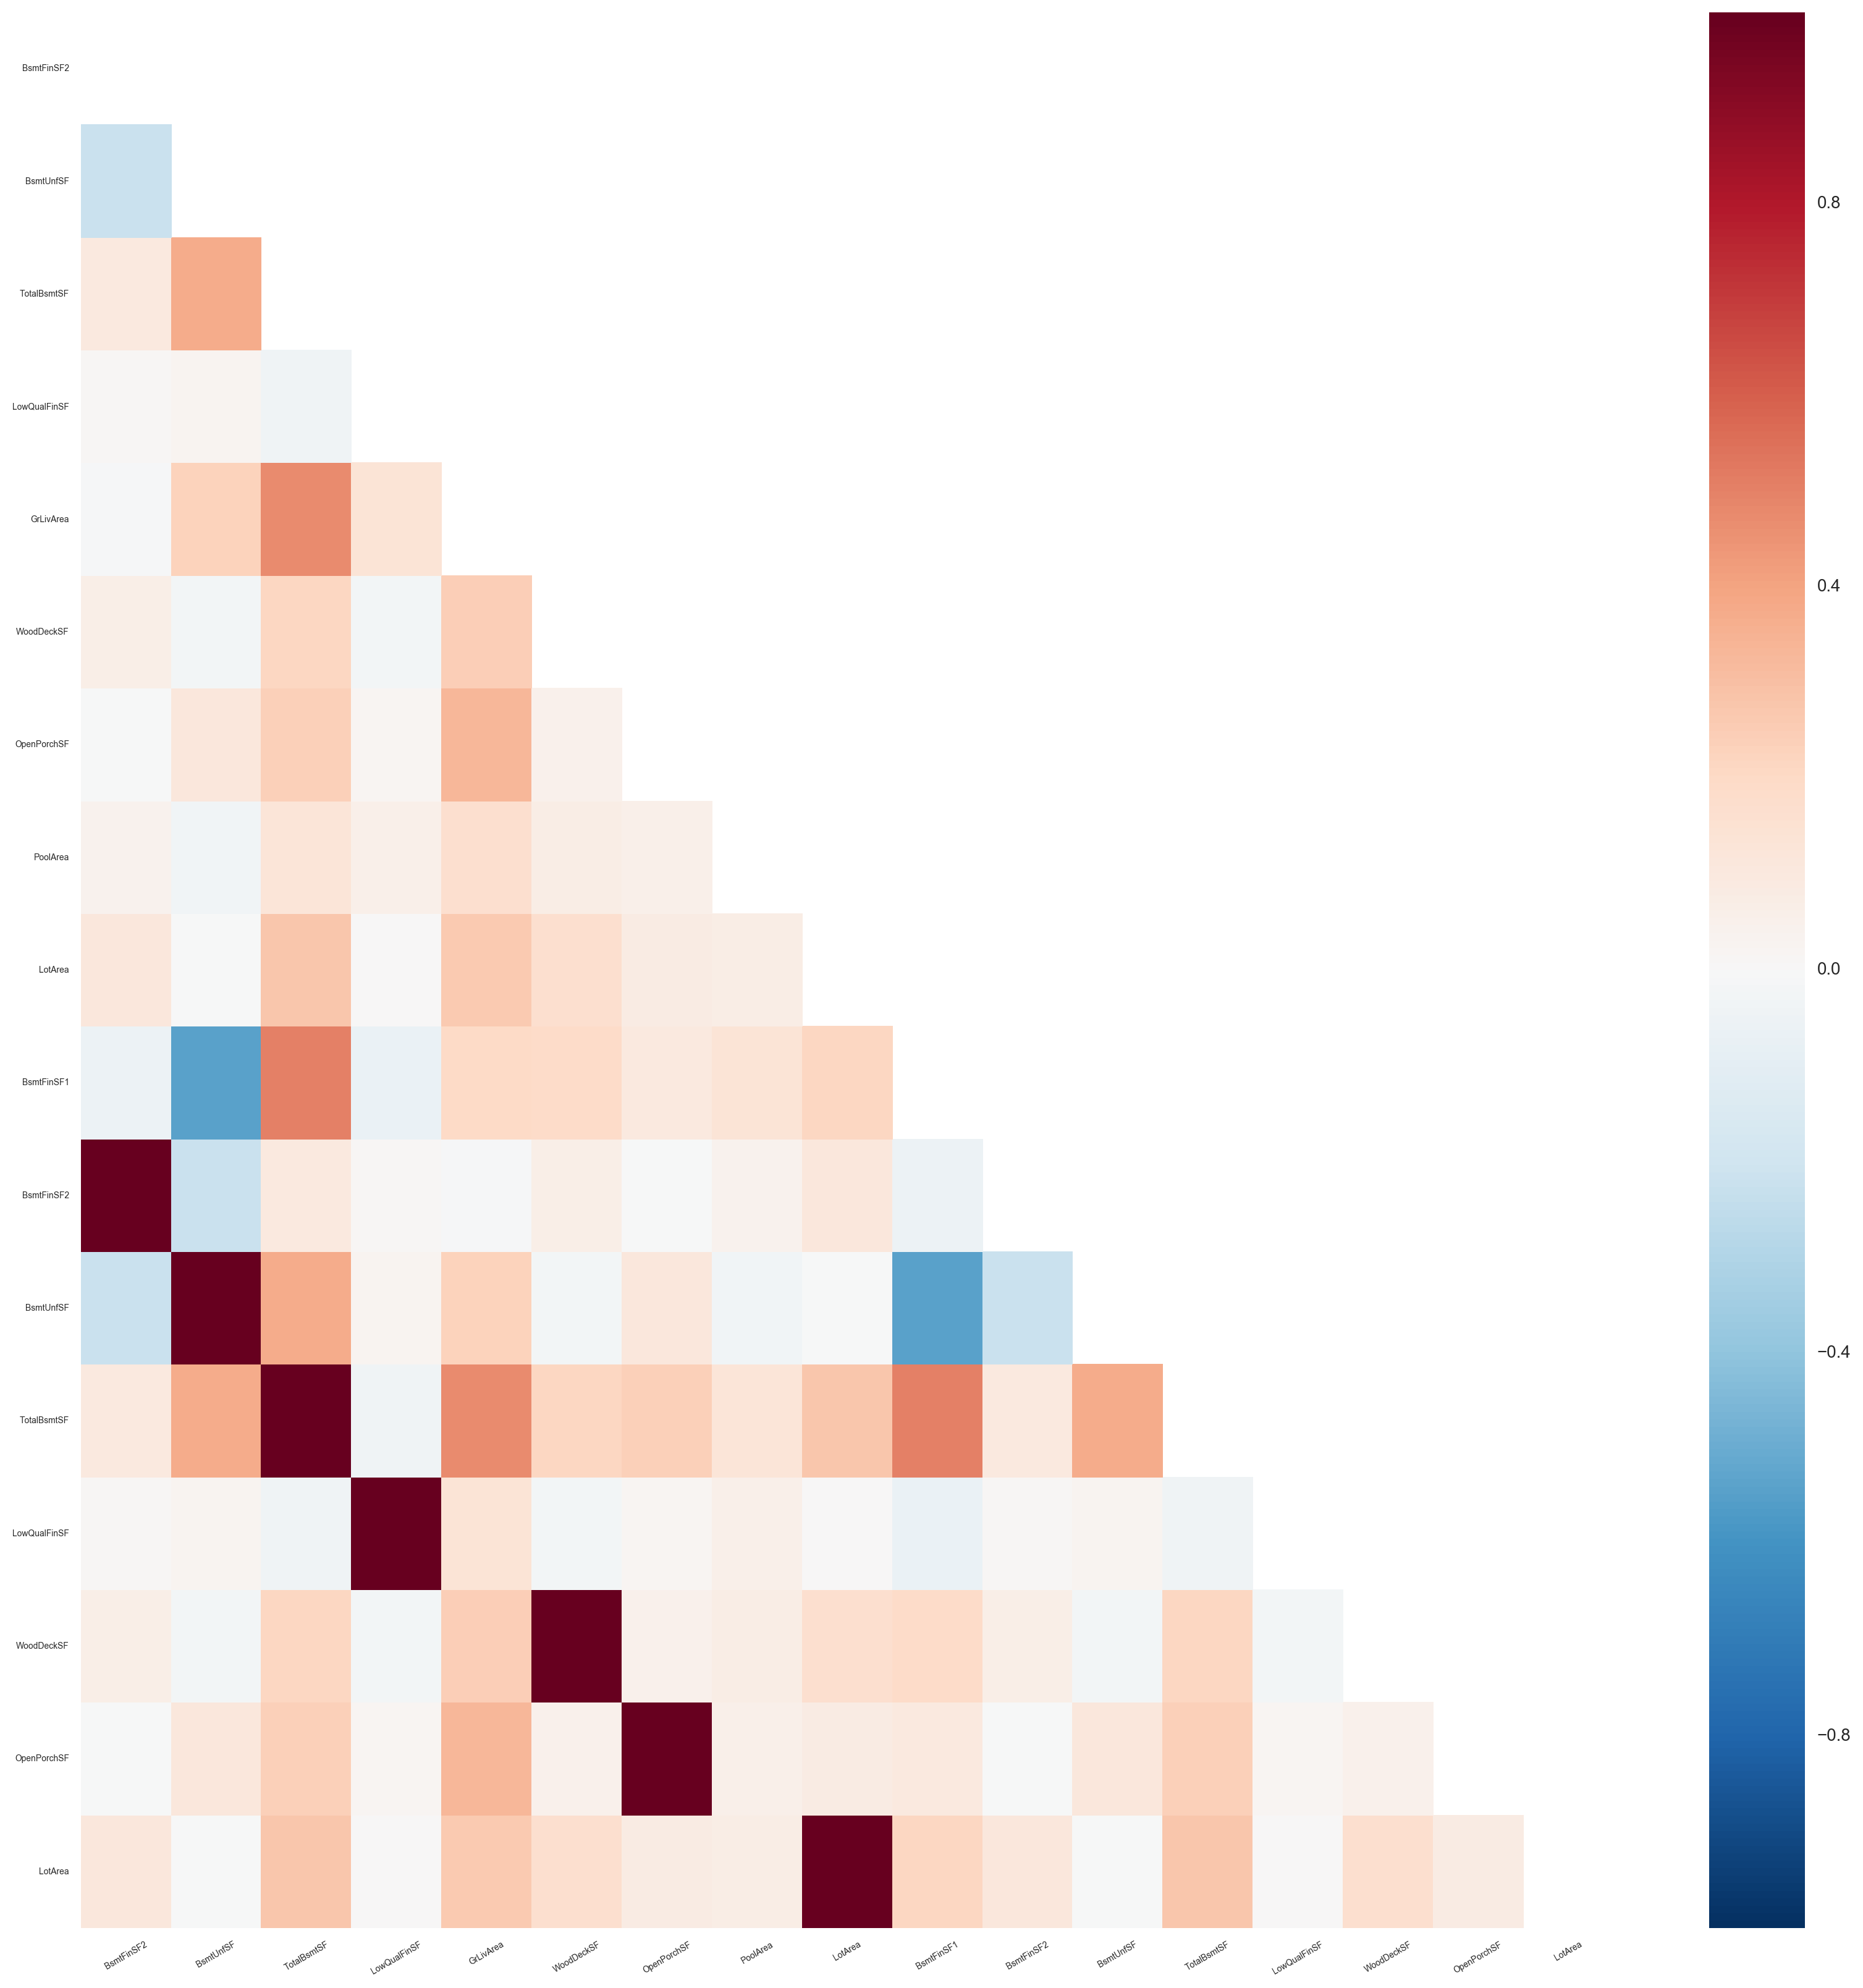

In [365]:
def correlation_heat_map(df):
    corrs = sqft_df.corr()
    plt.rcParams['figure.figsize']=(20,20)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=False)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=5, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=5, rotation=0)
    plt.show()

correlation_heat_map(sqft_df)

### 12.3 Find the optimal Ridge `alpha` using either `RidgeCV` or a combination of `GridSearchCV` and `Ridge`.



In [366]:
ridge_alphas = np.logspace(0, 5, 300)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(sqft_df, y)

print optimal_ridge.alpha_

100000.0


### 12.4 Compare the cross-validated $R^2$ score for a standard Linear Regression and your Ridge regression

--> Line Regression shows a greater score compared to the ridge regression. Ridge regression adds penalty that is equivalent
to square of the magnitude of coefficients. Linear Resgression does not add any penalty to the model and leads to a 
stronger score but creates a model that is less reliable. 

In [371]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, sqft_df, y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.65253224  0.68070995  0.75524304  0.55088713  0.7420413   0.69037752
  0.6325759   0.68572964 -0.05127959  0.69856476]
0.603738189799


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 13. Explain the difference between Ridge and Lasso regularization

---

- When are good scenarios to use each? What problems do they address?
- Why do they have the effects they do on coefficients?
- What is their effect on bias and variance?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 14. Gridsearch an optimal `ElasticNet` regression.

---

On the full predictor matrix, search for the optimal hyperparameters for an Elastic Net regression. Remember that the Elastic net is a mixture of the Ridge and Lasso, and has both an `alpha` parameter to regularize as well as an `l1_ratio`, which is the balance of Lasso vs. Ridge.

How does the ElasticNet compare to the Lasso on the dataset? What does the `l1_ratio` tell you about the balance of Ridge vs. Lasso in your model?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 15. Further fine-tune the model to predict price

---

Your goal is to create the model with the best predictive power.

You can use as much feature engineering and transformation of variables that you want, but please limit yourself to using the regression models we have covered in class thus far. When we cover models like Random Forests and Gradient Boosted Trees we will return to this dataset and see how they compare to the regression models.

For those that tackle this problem, you will have a chance to show what you did and compare to what your other classmates came up with during class (if you want). **Feel free to collaborate with your classmates on improving the model!**